In [1]:
#Able to interact with plot
#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

import matplotlib.colors as mcolors
import matplotlib
import numpy as np 
import matplotlib.pyplot as plt
import math

#Custom colourmap, from white->transparent
colors = [(256, 256, 256,c) for c in np.linspace(1,0,100)]
mycmap = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=20)

colors3 = [(256, 256, 256,c) for c in np.linspace(1,0,5)]
mycmap3 = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=20)

#Transparent->Black
c_white = matplotlib.colors.colorConverter.to_rgba('white',alpha = 0)
c_black= matplotlib.colors.colorConverter.to_rgba('black',alpha = 1)
mycmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',[c_white,c_black],512)

#white->Red
white1 = matplotlib.colors.colorConverter.to_rgba('white',alpha=1)
red1= matplotlib.colors.colorConverter.to_rgba('red',alpha = 1)
mycmap3 = matplotlib.colors.LinearSegmentedColormap.from_list('wr_cmap',[white1,red1],1)

#Defining variables
ariel_n_num = np.genfromtxt("./ArielData.csv", usecols=[1], delimiter = ',', skip_header = 1)
ariel_p_num = np.genfromtxt("./ArielData.csv", usecols=[0], delimiter = ',', skip_header = 1)
ariel_pps = np.genfromtxt("./ArielData.csv", usecols=[4], delimiter = ',', skip_header = 1)
mass_num = [] #mass number 
atom_num = [] #atomic number 
n_num = [] #neutron number 
m_unc1 = [] #mass excess uncertainty
m_unc = []
half_life = []
half_life_unc = []
stbl = []
pnum = np.genfromtxt("./moredata.csv", usecols=[0], delimiter = ',', skip_header = 9)
nnum = np.genfromtxt("./moredata.csv", usecols=[1], delimiter = ',', skip_header = 9)
fmax = np.genfromtxt("./moredata.csv", usecols=[-1], delimiter = ',', skip_header = 9) 

#Defining half-life converter function 



#look up hash table 
def conversion(unit): 
    conversion_dict = {' y': 3.154e7, ' s': 1.0, "ys" :1e-24, "ms":1e-3, "as":1e-18, "zs":1e-21, " d":86400, "My":3.154e13, "ns":1e-9, " m":60, 
                      "ky":3.154e10, "us":1e-6, " h":3600, "ps":1e-12, "Yy":3.154e13, "Zy":3.154e28, "Ey":3.154e25, "Py":3.154e22,
                      "Ty":3.154e19, "Gy":3.154e16, "hy":3.154e9, "dy": 3.154e8, "ds": 1e-1, "cs": 1e-2, "fs": 1e-15}
    return conversion_dict[unit]


In [2]:
#Interesting i-process
iprocess_n_num = np.genfromtxt("./nuclide_info.csv", usecols=[2], delimiter = ',', skip_header = 8)
iprocess_p_num = np.genfromtxt("./nuclide_info.csv", usecols=[1], delimiter = ',', skip_header = 8)

In [3]:
#Parsing through file 
with open('./nubase_4.mas20.txt') as f:
    lines = f.readlines()[25:]
    for line in lines:
        if line[16]!=' ': 
            continue 
        
        mass_num.append(int(line[0:3]))
        atom_num.append(int(line[4:7]))
        n_num.append(int(line[0:3])-int(line[4:7]))
        
        index = line[31:42].find('#')
        if index != -1: # contains # -> from systematics
            m_unc.append(float(line[31:31+index])*10)
        else: 
            m_unc.append(float(line[31:42]))
            
#        print("Half life = ", line[69:78])
#        print("Half life uncertainty = ", line[81:88])
#        print("Half life unit = ", line[78:80])
        
        hl = line[69:78]
        hlunc = line[81:88]
        hlunit = line [78:80]
        
        #Creating stable plot
        if hl == ' stbl    ' or int(line[0:3])==232 and int(line[4:7])==90 or  int(line[0:3])==238 and int(line[4:7])==92 or int(line[0:3])==209 and int(line[4:7])==83: 
            stbl.append(1)
        else: 
            stbl.append(0)
        
        #Creating half life data  
        if hl == ' stbl    ': 
            half_life.append(3.154e34)
            half_life_unc.append(0)
        elif hl == " p-unst  ":
            half_life_unc.append(1e-27)
            half_life.append(1e-27)
        elif hl == "         " and hlunc == '       ': 
            half_life.append(0)
            half_life_unc.append(0)
        elif hl.find('#') != -1 or hl.find('<') != -1 or hl.find(">") != -1 or hl.find("~") != -1:
            if hl.find('#') != -1 and hl.find(">") != -1:
                i1 = hl.find("#")
                i11 = hl.find(">")
                half_life.append(float(hl[:i11]+hl[i11+1:i1])*conversion(hlunit))
                half_life_unc.append(float(hl[:i11]+hl[i11+1:i1])*conversion(hlunit)) 
            elif hl.find('#') != -1: 
                i2 = hl.find('#')
                half_life.append(float(hl[:i2]+hl[i2+1:])*conversion(hlunit))
                half_life_unc.append(float(hl[:i2]+hl[i2+1:])*conversion(hlunit)) 
            elif hl.find('<') != -1:
                i3 = hl.find("<")
                half_life.append(float(hl[i3+1:])*conversion(hlunit))
                half_life_unc.append(float(hl[i3+1:])*conversion(hlunit))
            elif hl.find(">") != -1: 
                i4 = hl.find('>')
                half_life.append(float(hl[i4+1:])*conversion(hlunit))
                half_life_unc.append(float(hl[i4+1:])*conversion(hlunit))    
            elif hl.find("~") != -1:  
                i5 = hl.find('~')
                half_life.append(float(hl[i5+1:])*conversion(hlunit))
                half_life_unc.append(float(hl[i5+1:])*conversion(hlunit))    
        elif hl != "         " and hlunc != '       ': 
            half_life.append(float(hl)*conversion(hlunit))
            half_life_unc.append(float(hlunc)*conversion(hlunit))
        elif hl == "         " and hlunc != '       ': 
            hlunit2 = str(''.join(t for t in hlunc if t.isalpha()))
            hl2 = float(''.join(c for c in hlunc if c.isdigit()))
            half_life.append(hl2*conversion(hlunit2))
            half_life_unc.append(hl2*conversion(hlunit2))
        elif hl != "         " and hlunc == '       ':
            half_life.append(float(hl)*conversion(hlunit))
            half_life_unc.append(float(hl)*conversion(hlunit))
            
            


rel_hl_unc = []
for i in range(len(half_life)):
    if half_life_unc[i] == 0:
        rel_hl_unc.append(0)
    else:
        rel_hl_unc.append(100*half_life_unc[i]/half_life[i])
        if half_life_unc[i]/half_life[i] > 1: 
            print("mass # = ", mass_num[i])
            print("atom_num = ", atom_num[i])


mass # =  115
atom_num =  45
mass # =  187
atom_num =  73
mass # =  201
atom_num =  88


In [4]:
#Calculating ARIEL yield to experiment:
alkalis = [3, 11, 19, 37, 55, 87]
alkaline = [4, 12, 20, 38, 56, 88]
gas = [2, 10, 18, 36, 54, 86]
refmet = [40, 41, 42, 43, 44, 45,46]
metals = np.genfromtxt("./untitled.txt", usecols=[2])
nonmetals = np.genfromtxt("./untitled1.txt", usecols=[2])
        
#Getting half life information: 
ariel_hl = []
for i in range(len(ariel_n_num)): 
    for j in range(len(n_num)): 
        if float(n_num[j]) == float(ariel_n_num[i]) and float(atom_num[j]) == float(ariel_p_num[i]): 
            ariel_hl.append(half_life[j])

print(len(ariel_hl))    
            
#Getting ionization efficiency and release time efficiency
i_eff = [] #ionization efficiency 
mu = [] #release time efficiency
for i in range(len(ariel_p_num)): 
    if float(ariel_p_num[i]) in alkalis: 
        i_eff.append(0.8)#0.8
        mu.append(0.5)#0.5
    elif float(ariel_p_num[i]) in alkaline: 
        i_eff.append(0.2)
        mu.append(0.04)
    elif float(ariel_p_num[i]) in refmet:      
        i_eff.append(0.0)
        mu.append(0.0)
    elif float(ariel_p_num[i]) in metals: 
        i_eff.append(0.1)#0.1
        mu.append(0.15)
    elif float(ariel_p_num[i]) in gas: 
        i_eff.append(0.1)
        mu.append(0.5)
    elif float(ariel_p_num[i]) in nonmetals: 
        #print("nonmetals")
        i_eff.append(0.03)
        mu.append(0.004)
    else: 
        i_eff.append(0.0)
        mu.append(0.0)
            
#Calculating release time efficiency
rt_eff = [] #release time efficiency 
ln2 = np.full((2968), math.log(2))

for i in range(len(mu)): 
    if ariel_hl[i]==0: 
        rt_eff.append(0)
    else: 
        rt_eff.append(mu[i]/(mu[i]+(math.log(2)/ariel_hl[i])))
        

exp_yield1 = np.multiply(np.multiply(ariel_pps,i_eff), rt_eff)
exp_yield = []

print(min(exp_yield1))

for i in range(len(exp_yield1)): 
    if exp_yield1[i]<1: 
        exp_yield.append(0)
    else: 
        exp_yield.append(exp_yield1[i])
        



2968
0.0


In [5]:
#Making ARIEL mask
ariel_mask_weight = []
mask_n = []
mask_p = []

for i in range(180): 
    for j in range(120): 
        mask_n.append(i+1)
        mask_p.append(j+1)

for i in range(len(mask_n)): 
    counter = 0
    for j in range(len(ariel_n_num)): 
        if ariel_n_num[j]==mask_n[i] and ariel_p_num[j]==mask_p[i]: 
            if exp_yield[j]!=0:
                counter += 1
    if counter == 0: 
        ariel_mask_weight.append(0.01)
    else: 
         ariel_mask_weight.append(1)
    





In [6]:
fmax_weight = []
for i in range(len(mask_n)): 
    counter2 = 0
    for j in range(len(nnum)): 
        if nnum[j]==mask_n[i] and pnum[j]==mask_p[i]: 
            if fmax[j]!=0:
                counter2 += 1
    if counter2 == 0: 
        fmax_weight.append(0.01)
    else: 
         fmax_weight.append(1)


In [7]:
iprocess_weight = []
for i in range(len(mask_n)): 
    counter3 = 0
    for j in range(len(iprocess_n_num)): 
        if iprocess_n_num[j]==mask_n[i] and iprocess_p_num[j]==mask_p[i]: 
            counter3 += 1
    if counter3 == 0: 
        iprocess_weight.append(0.01)
    else: 
         iprocess_weight.append(1)


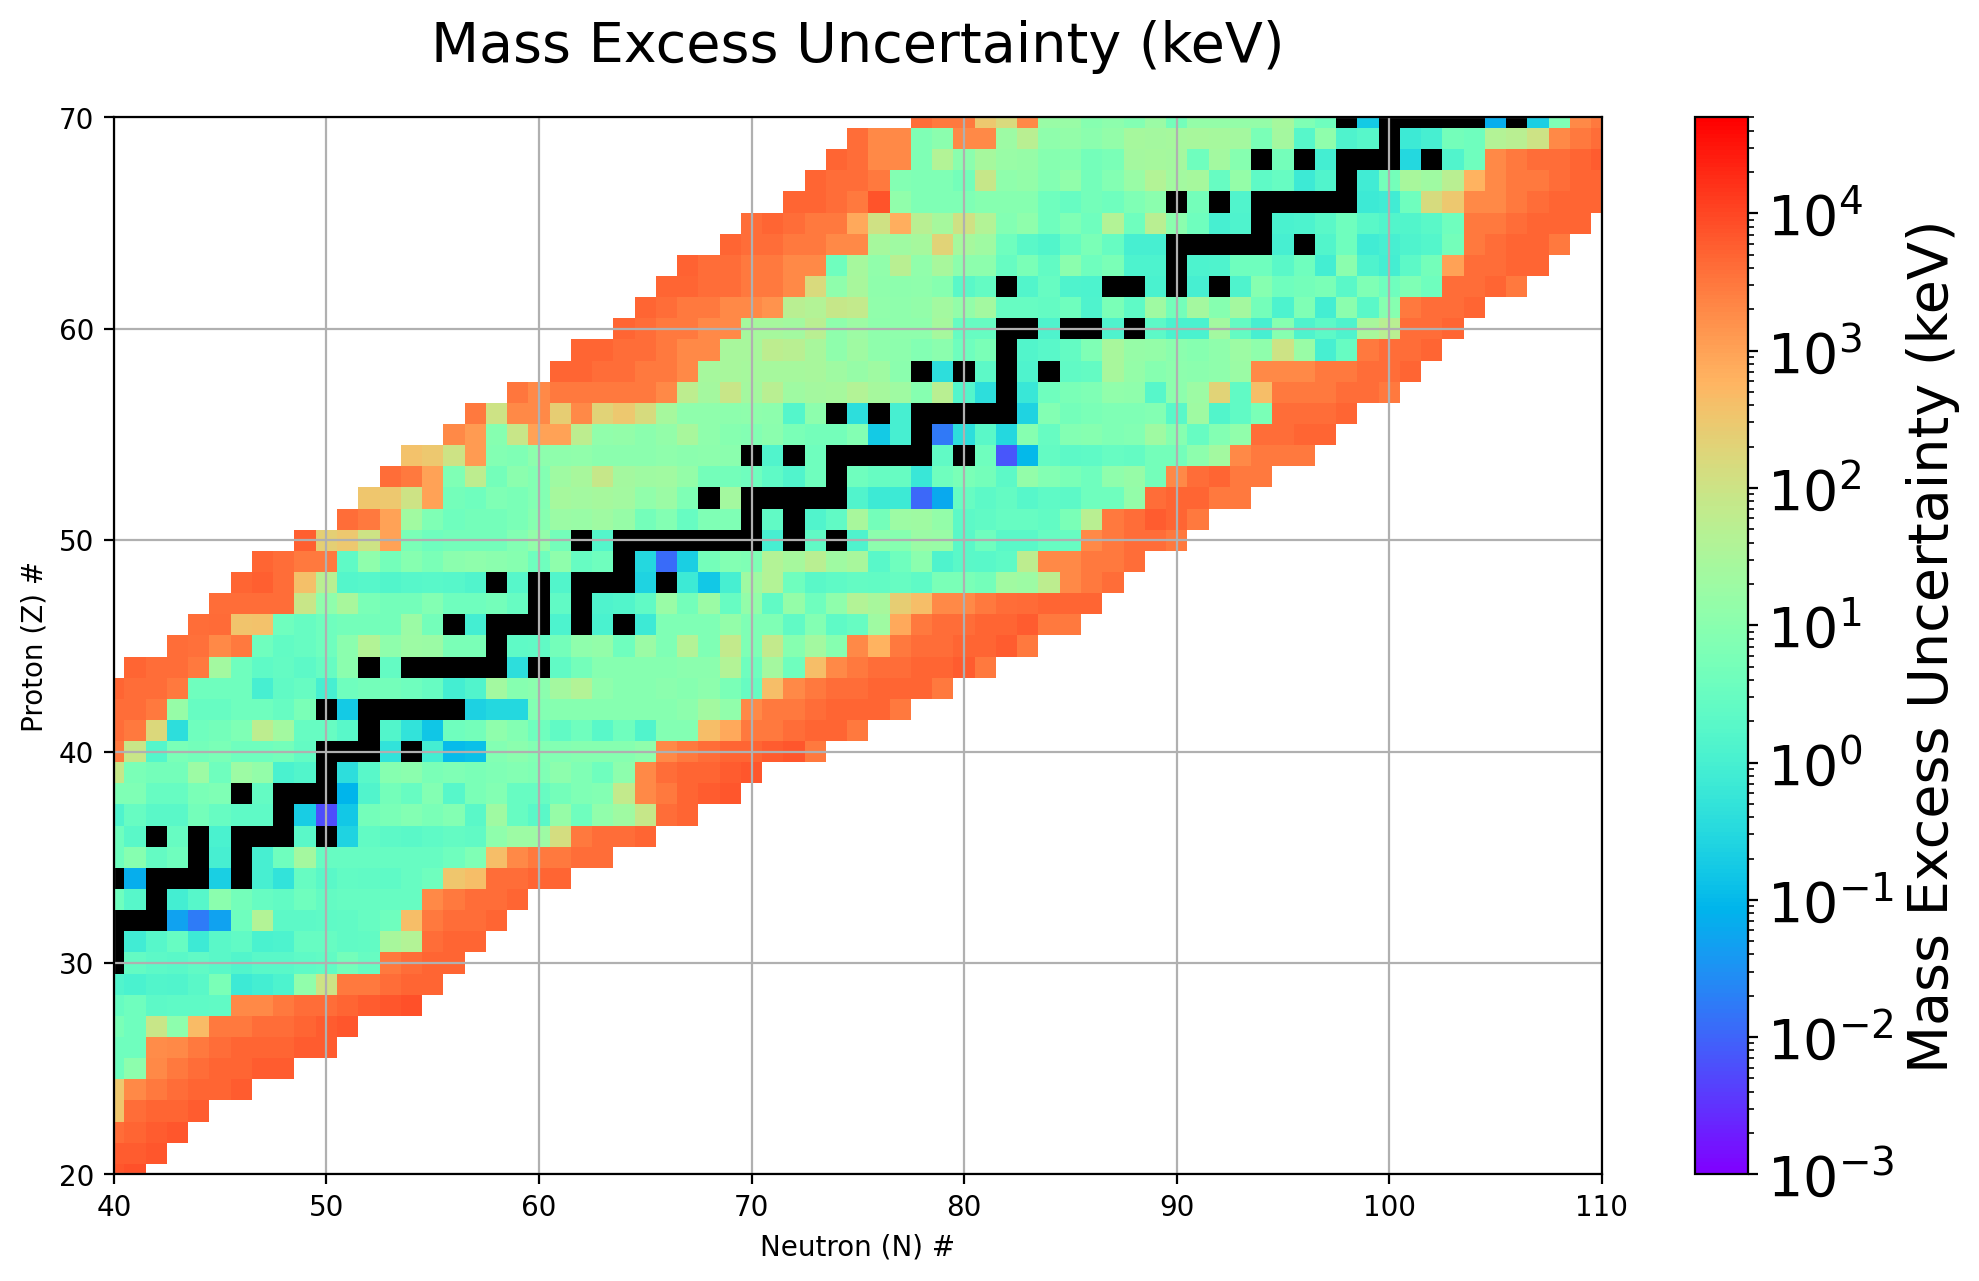

In [8]:
#Plotting mass excess uncertainty        
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=m_unc, norm=matplotlib.colors.LogNorm(), cmap = "rainbow")
cbar = plt.colorbar()
plt.clim(1e-3,5e4)
cbar.ax.tick_params(labelsize=20)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')
plt.title('Mass Excess Uncertainty (keV)', fontsize = 20, pad =20)
cbar.set_label('Mass Excess Uncertainty (keV)', fontsize = 20)
plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("MassExcessUncertainty")
plt.show()


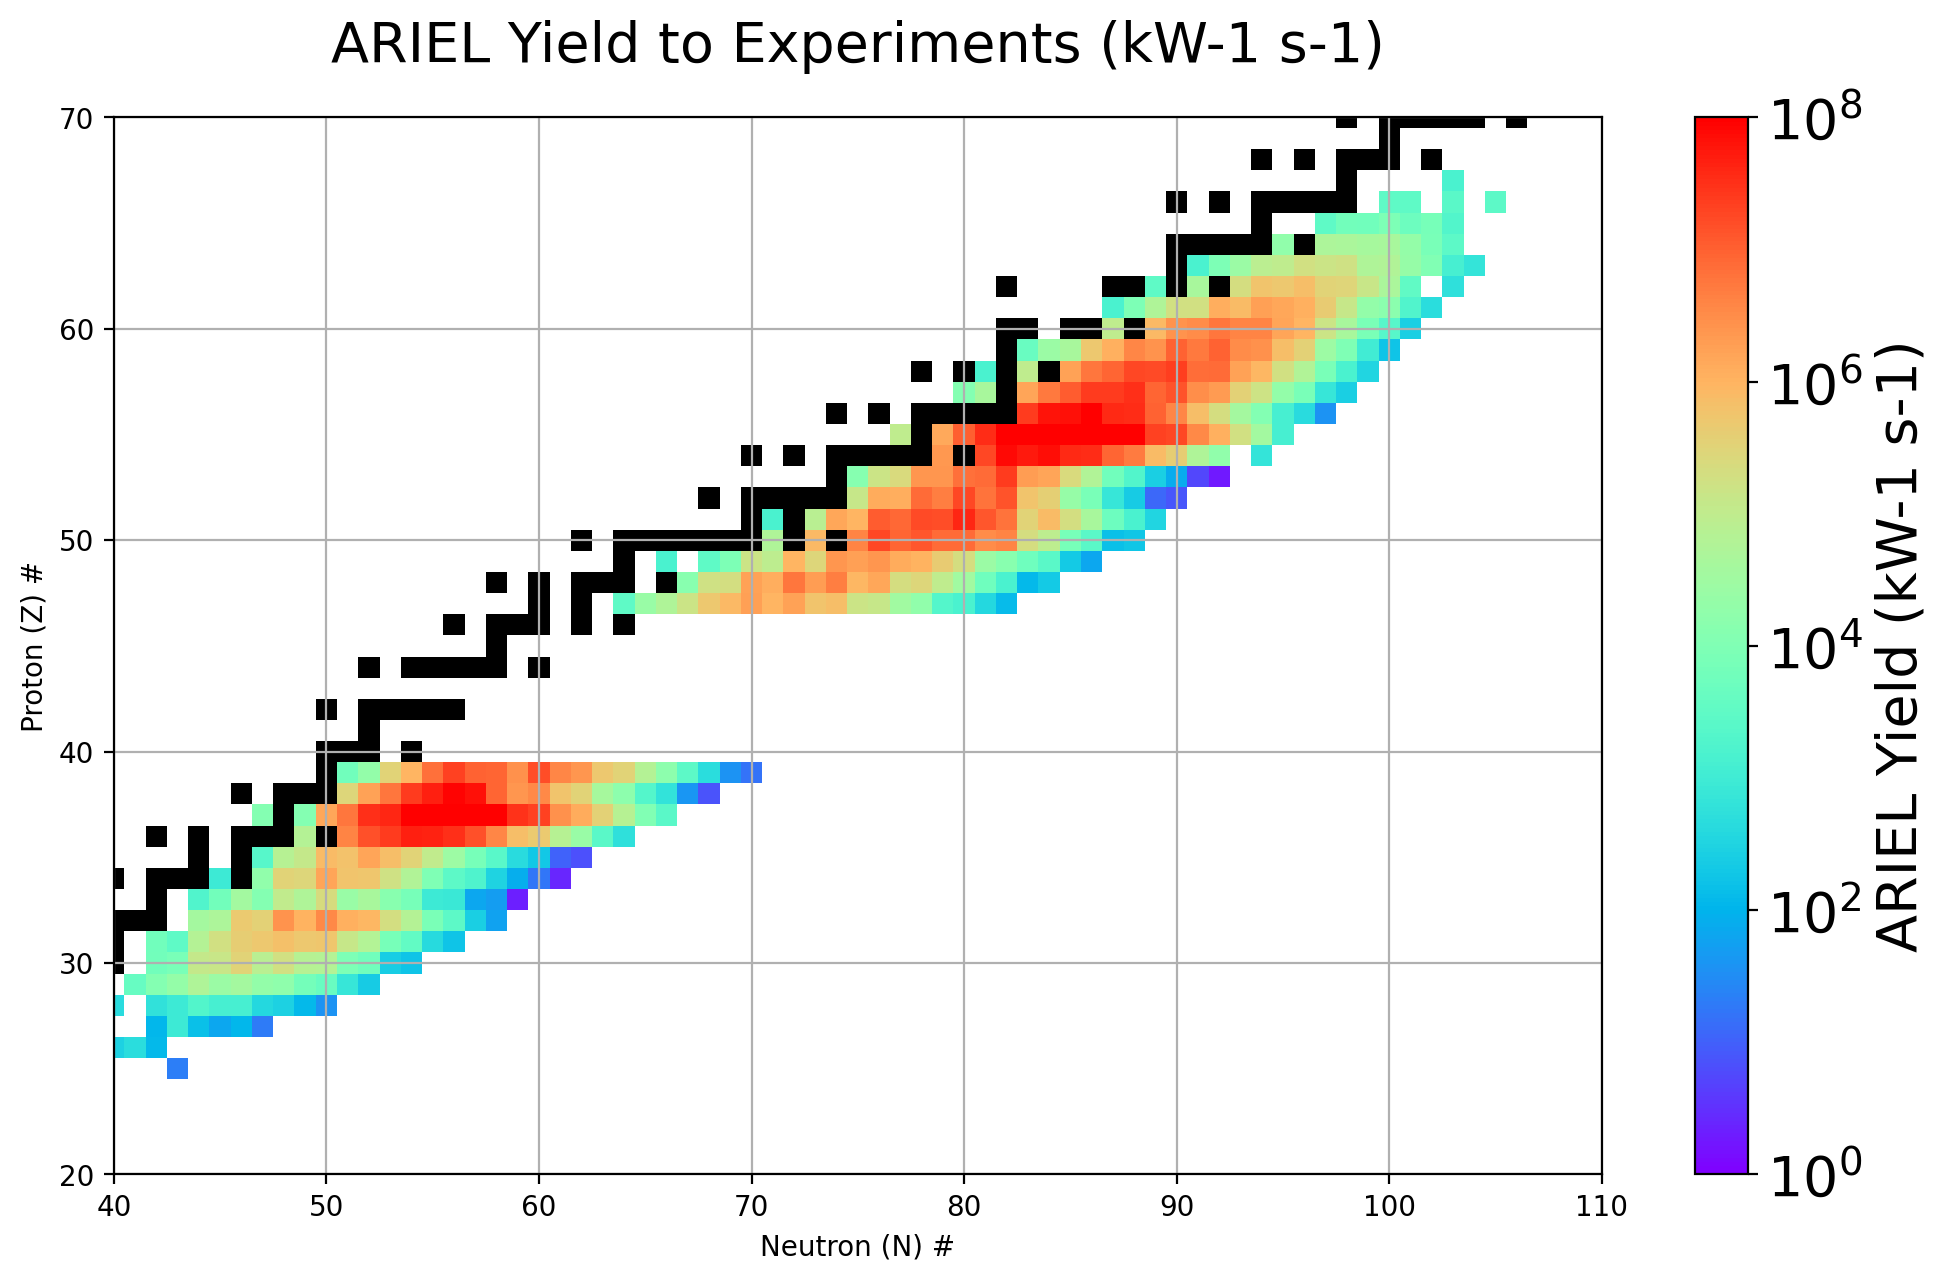

In [9]:
#Plotting ARIEL yield 

fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(ariel_n_num, ariel_p_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=exp_yield, norm=matplotlib.colors.LogNorm(), cmap="rainbow")
cbar = plt.colorbar()
plt.clim(1,1e8)
cbar.ax.tick_params(labelsize=20)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')
plt.title('ARIEL Yield to Experiments (kW-1 s-1)', fontsize = 20, pad = 20)
cbar.set_label('ARIEL Yield (kW-1 s-1)', fontsize = 20)
plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("ariel_yield")
plt.show()



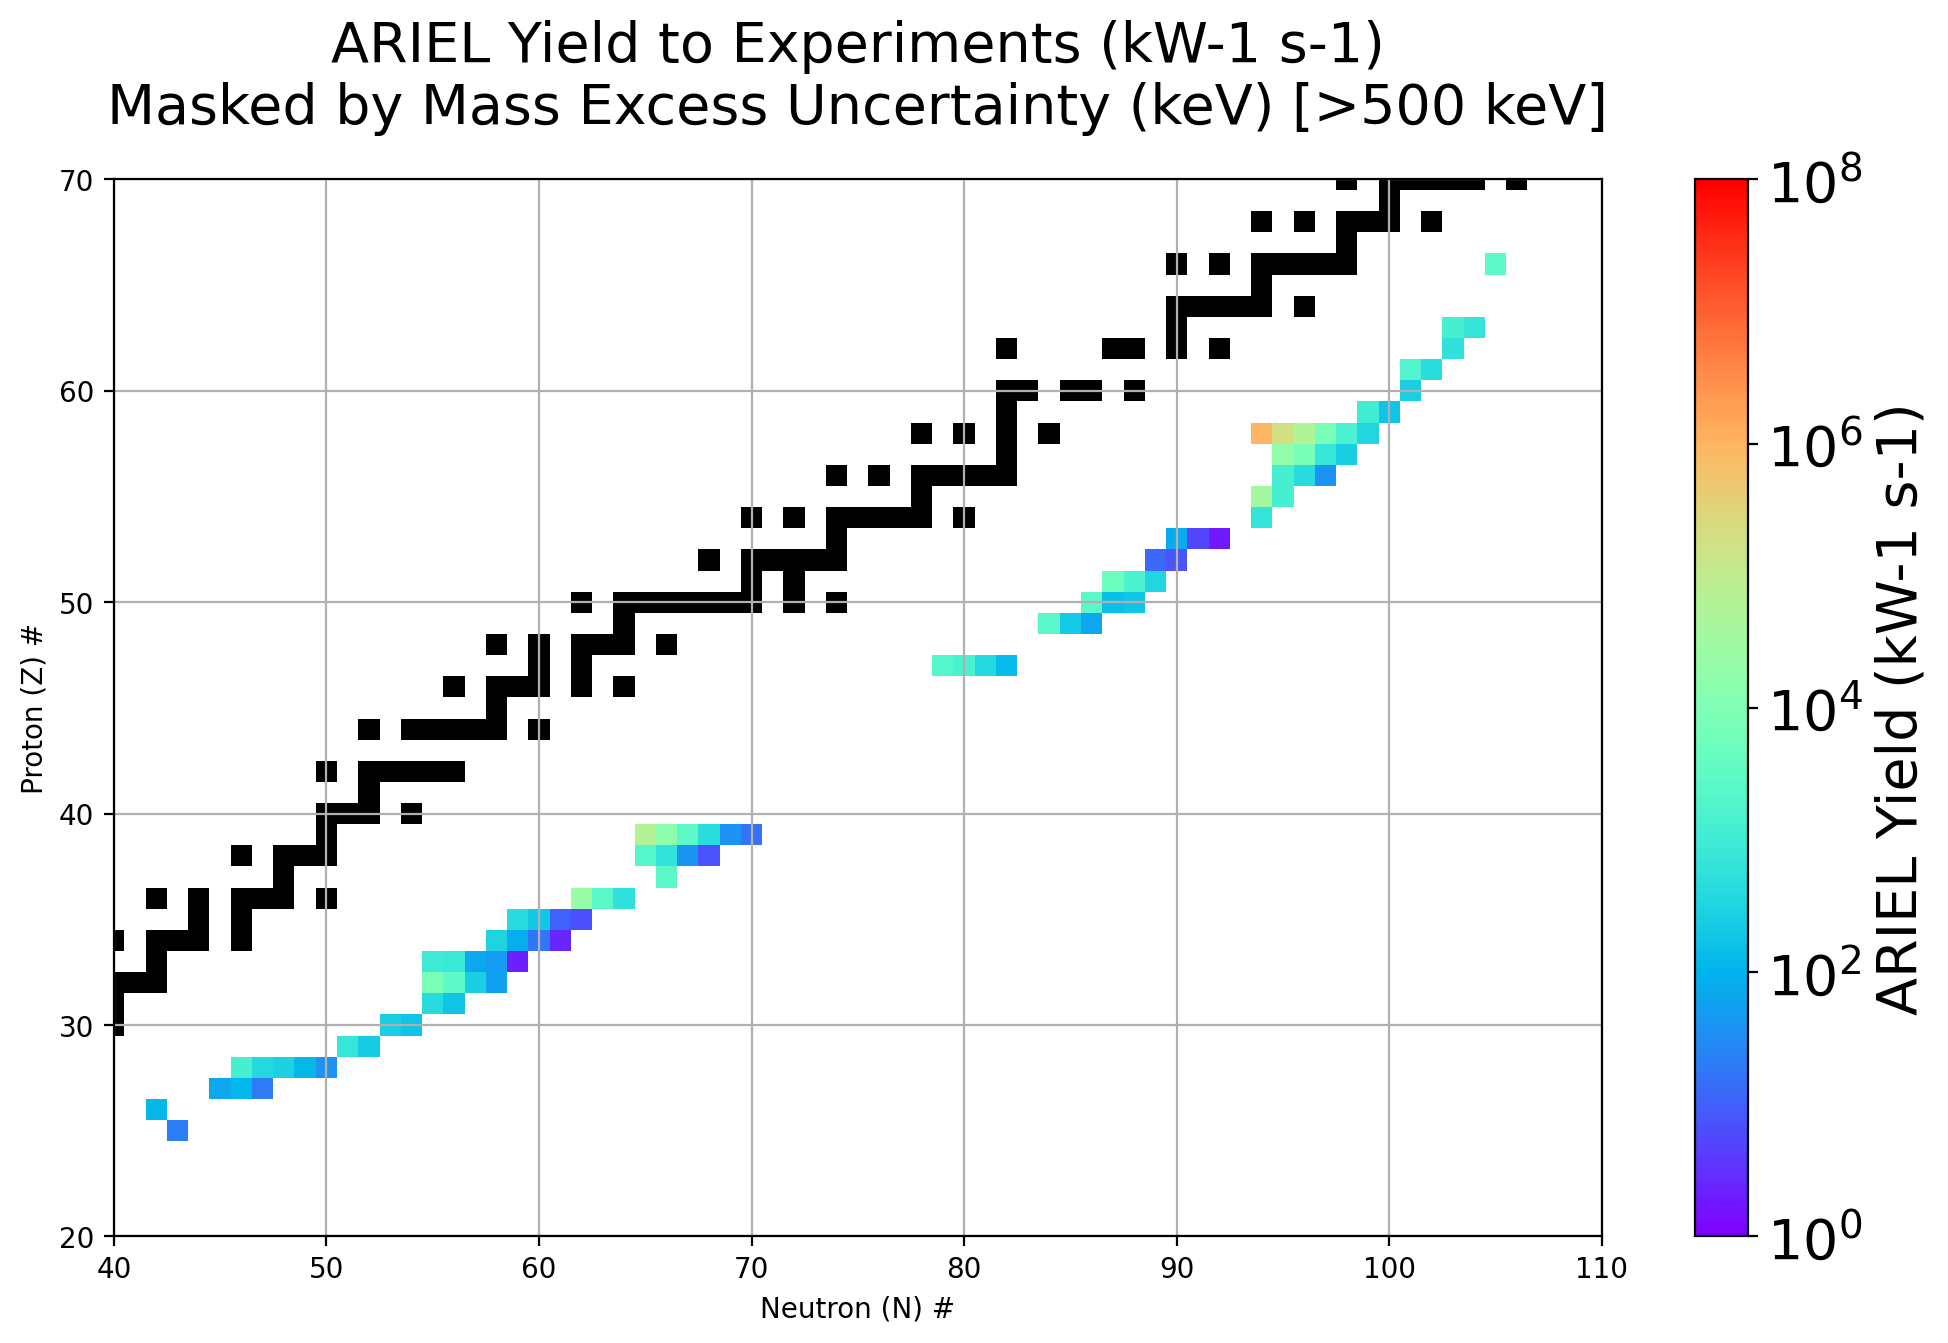

In [10]:
#ARIEL yield masked by mass uncertainty 
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(ariel_n_num, ariel_p_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=exp_yield, norm=matplotlib.colors.LogNorm(), cmap="rainbow")
cbar = plt.colorbar()
plt.clim(1,1e8)
cbar.ax.tick_params(labelsize=20)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=m_unc, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.clim(499,500)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')

plt.title('ARIEL Yield to Experiments (kW-1 s-1)\nMasked by Mass Excess Uncertainty (keV) [>500 keV]', fontsize = 20, pad = 20)
cbar.set_label('ARIEL Yield (kW-1 s-1)', fontsize = 20)


plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("mass_masking_ariel1")
plt.show()


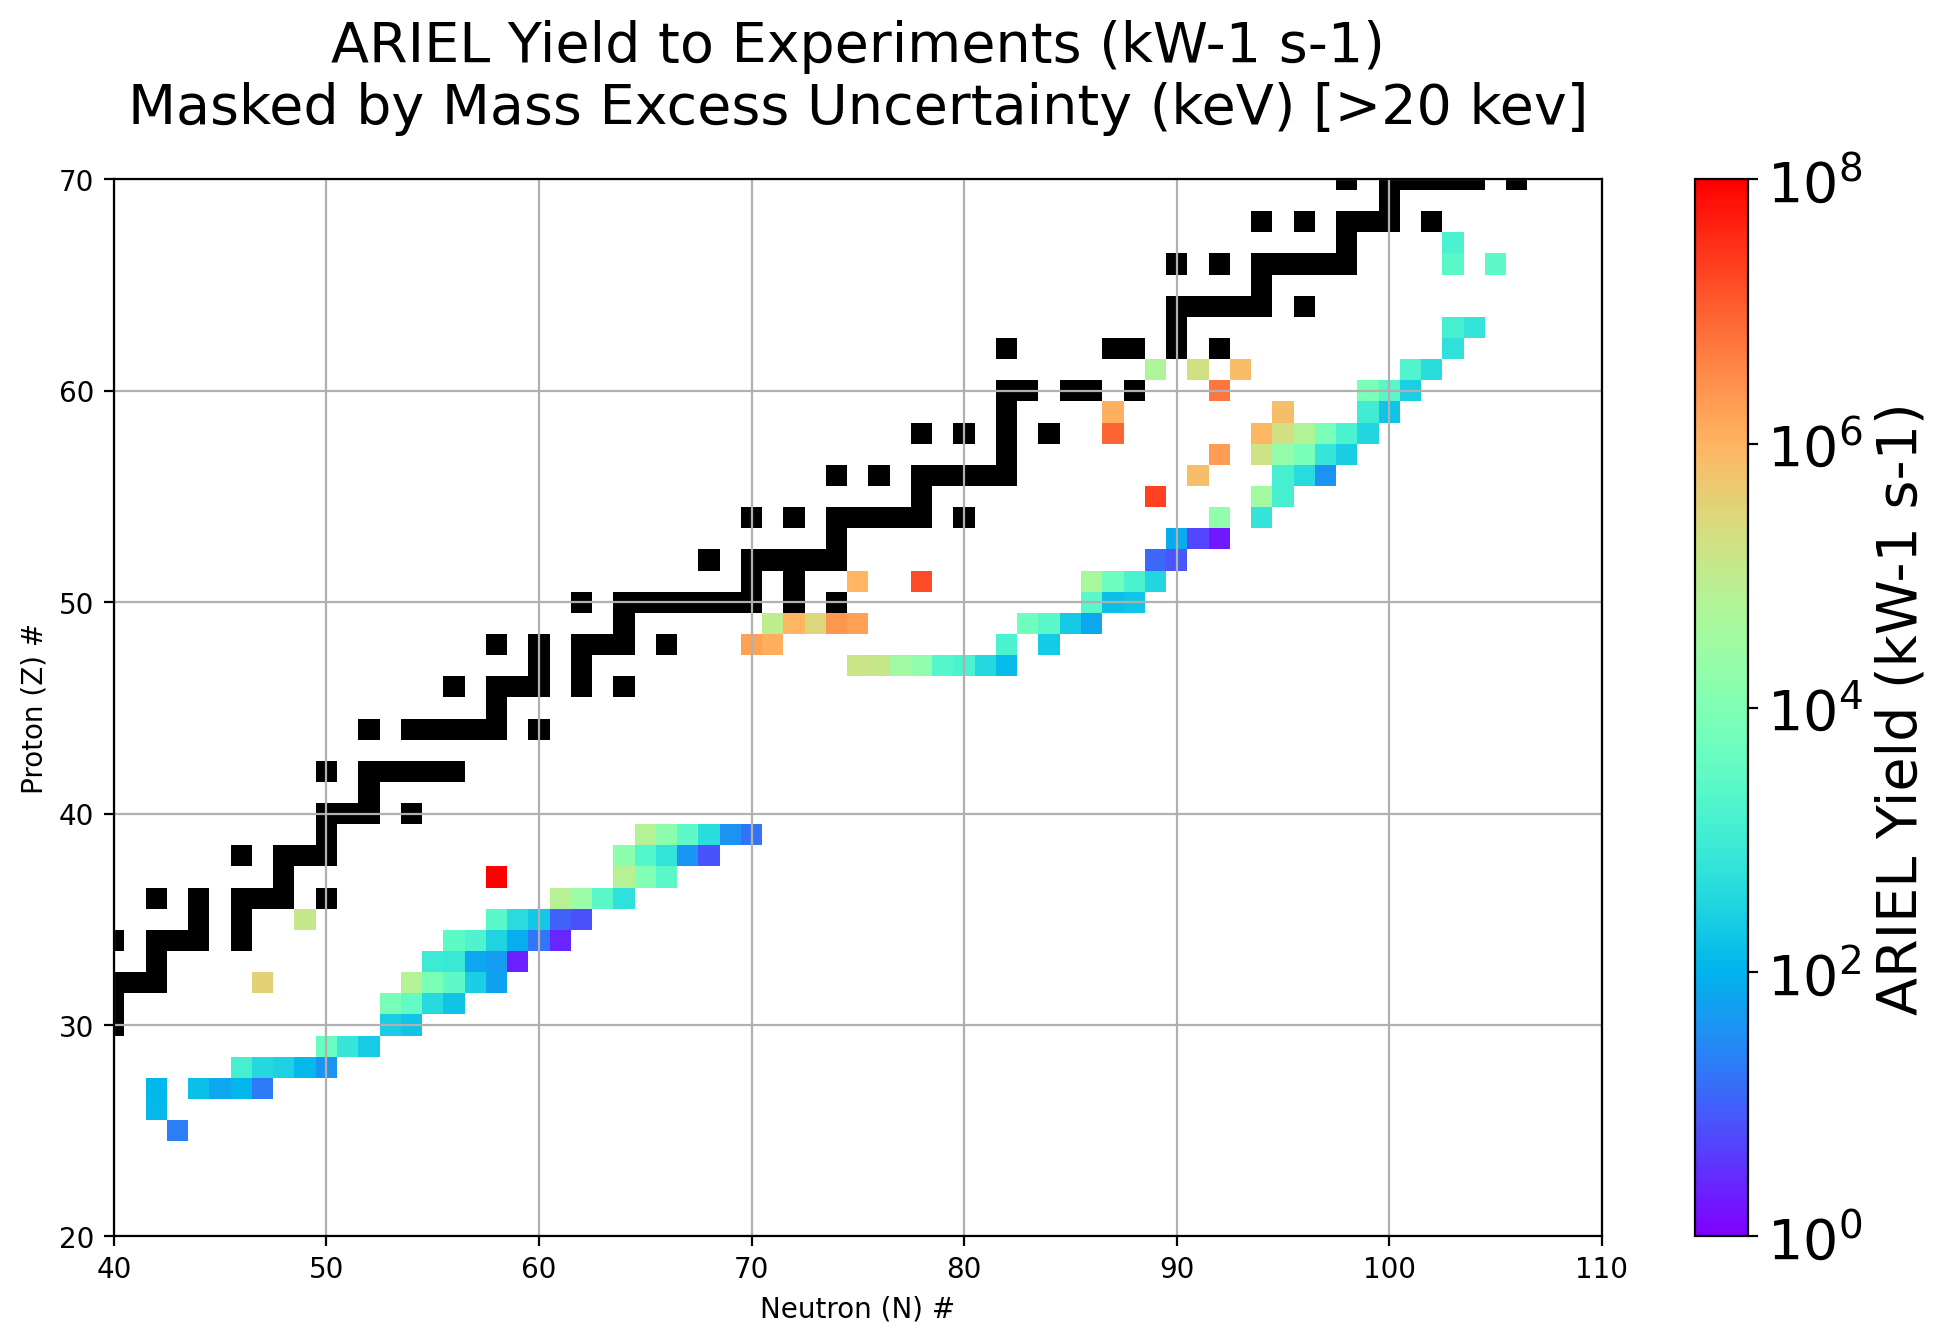

In [11]:
#ARIEL yield masked by mass uncertainty 
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(ariel_n_num, ariel_p_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=exp_yield, norm=matplotlib.colors.LogNorm(), cmap="rainbow")
cbar = plt.colorbar()
plt.clim(1,1e8)
cbar.ax.tick_params(labelsize=20)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=m_unc, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.clim(19,20)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')

plt.title('ARIEL Yield to Experiments (kW-1 s-1)\nMasked by Mass Excess Uncertainty (keV) [>20 kev]', fontsize = 20, pad = 20)
cbar.set_label('ARIEL Yield (kW-1 s-1)', fontsize = 20)


plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("mass_masking_ariel2")
plt.show()


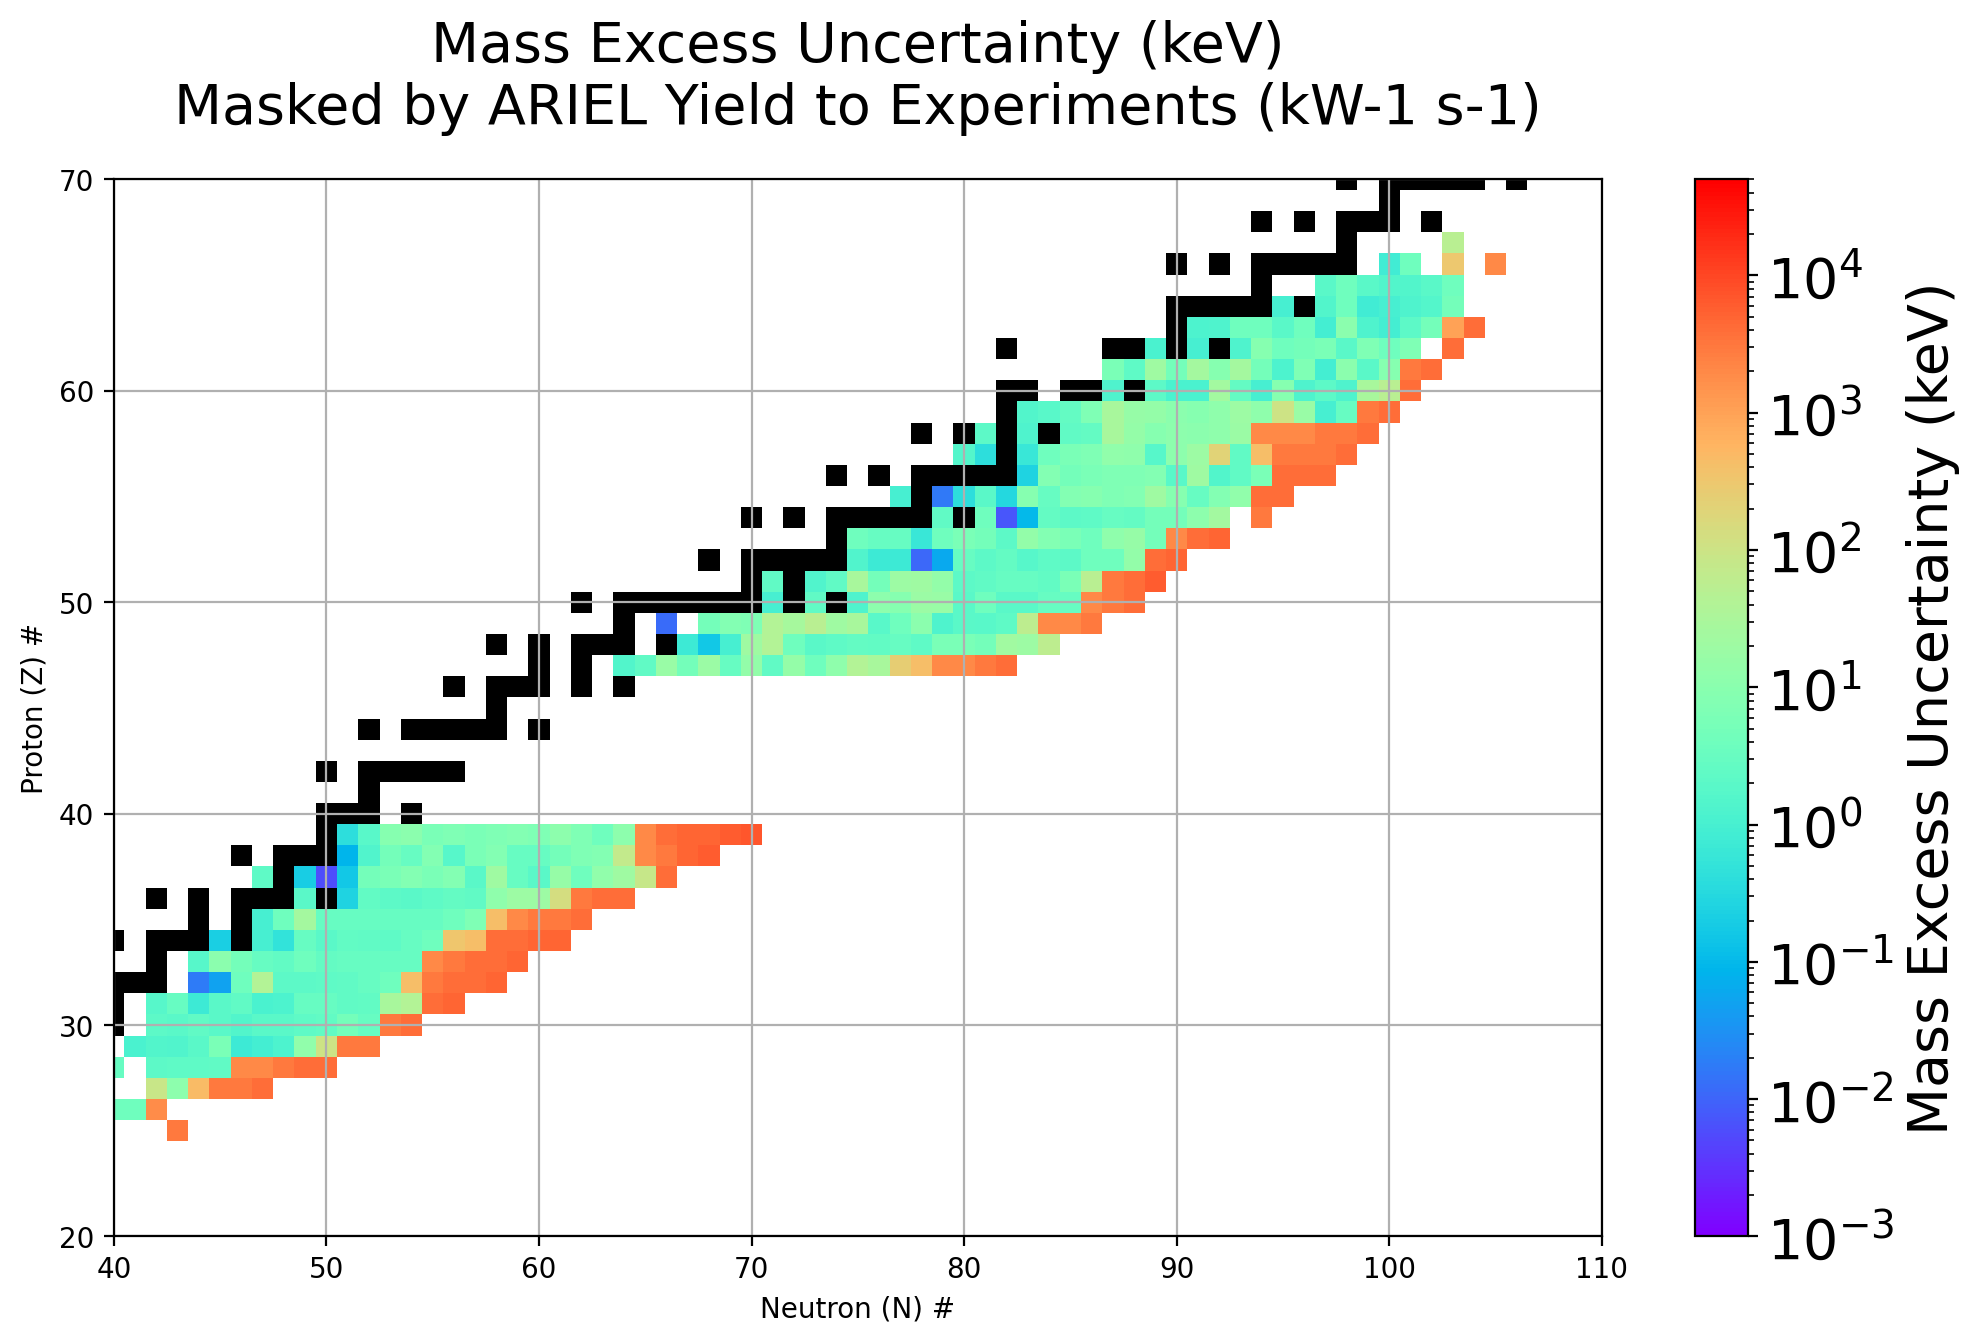

In [12]:
#Mass Uncertainty Masked by ARIEL Yields
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=m_unc, norm=matplotlib.colors.LogNorm(), cmap = "rainbow")
plt.clim(1e-3,5e4)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
ax2 = plt.gca()
plt.hist2d(mask_n, mask_p, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=ariel_mask_weight, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.clim(0.01,1)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')

plt.title('Mass Excess Uncertainty (keV)\nMasked by ARIEL Yield to Experiments (kW-1 s-1)', fontsize = 20, pad = 20)
cbar.set_label('Mass Excess Uncertainty (keV)', fontsize = 20)
plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("ariel_masking_mass")
plt.show()


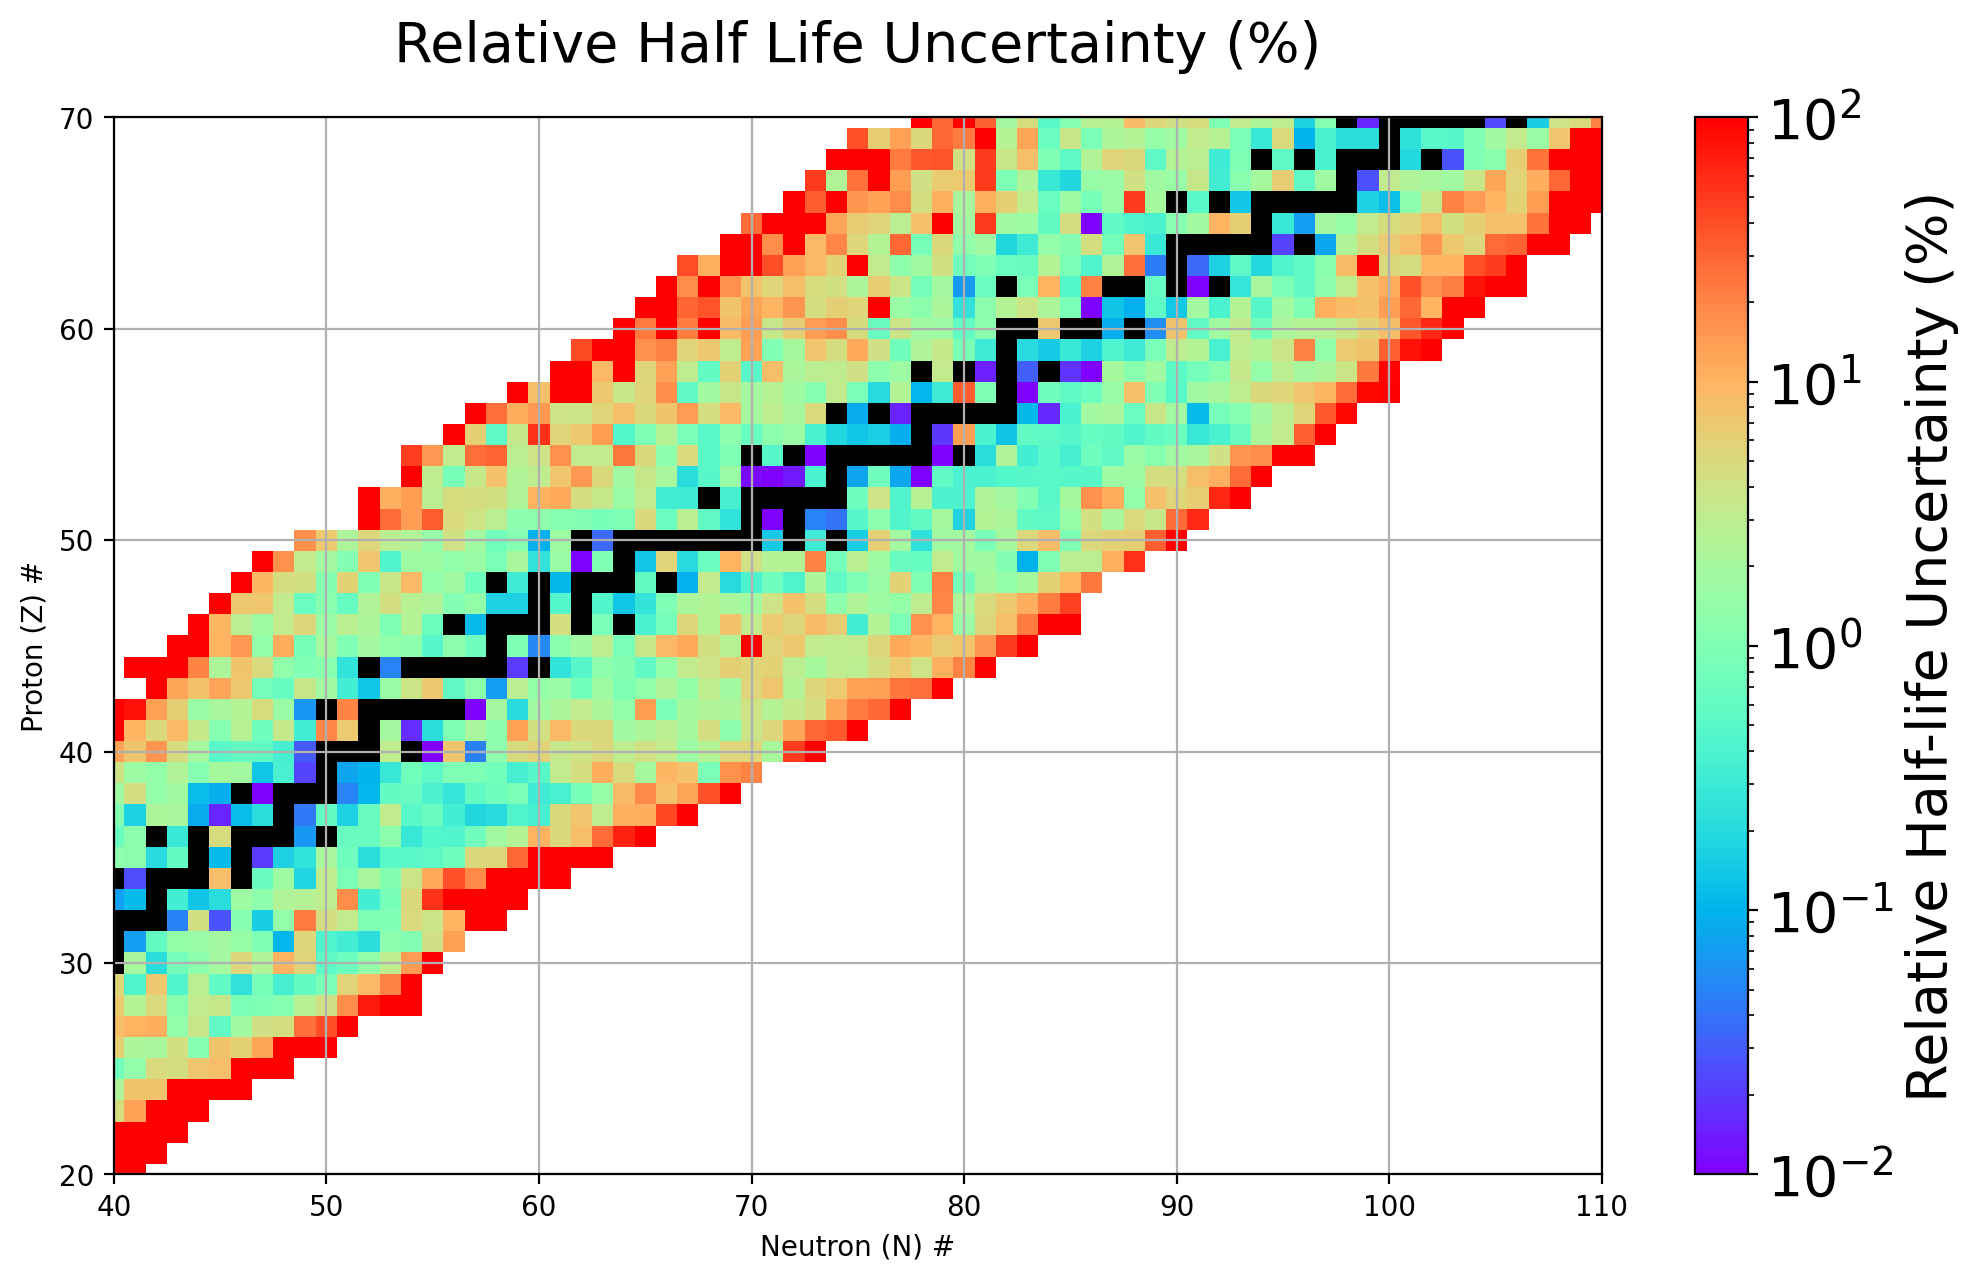

In [13]:
#Plotting relative half-life uncertainties, >5% = important 
#Plotting mass excess uncertainty        
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=rel_hl_unc, norm=matplotlib.colors.LogNorm(), cmap = "rainbow")
cbar = plt.colorbar()
plt.clim(1e-2,100)
cbar.ax.tick_params(labelsize=20)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')
plt.title('Relative Half Life Uncertainty (%)', fontsize = 20, pad = 20)
cbar.set_label('Relative Half-life Uncertainty (%)', fontsize = 20)
plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("hl_unc")
plt.show()


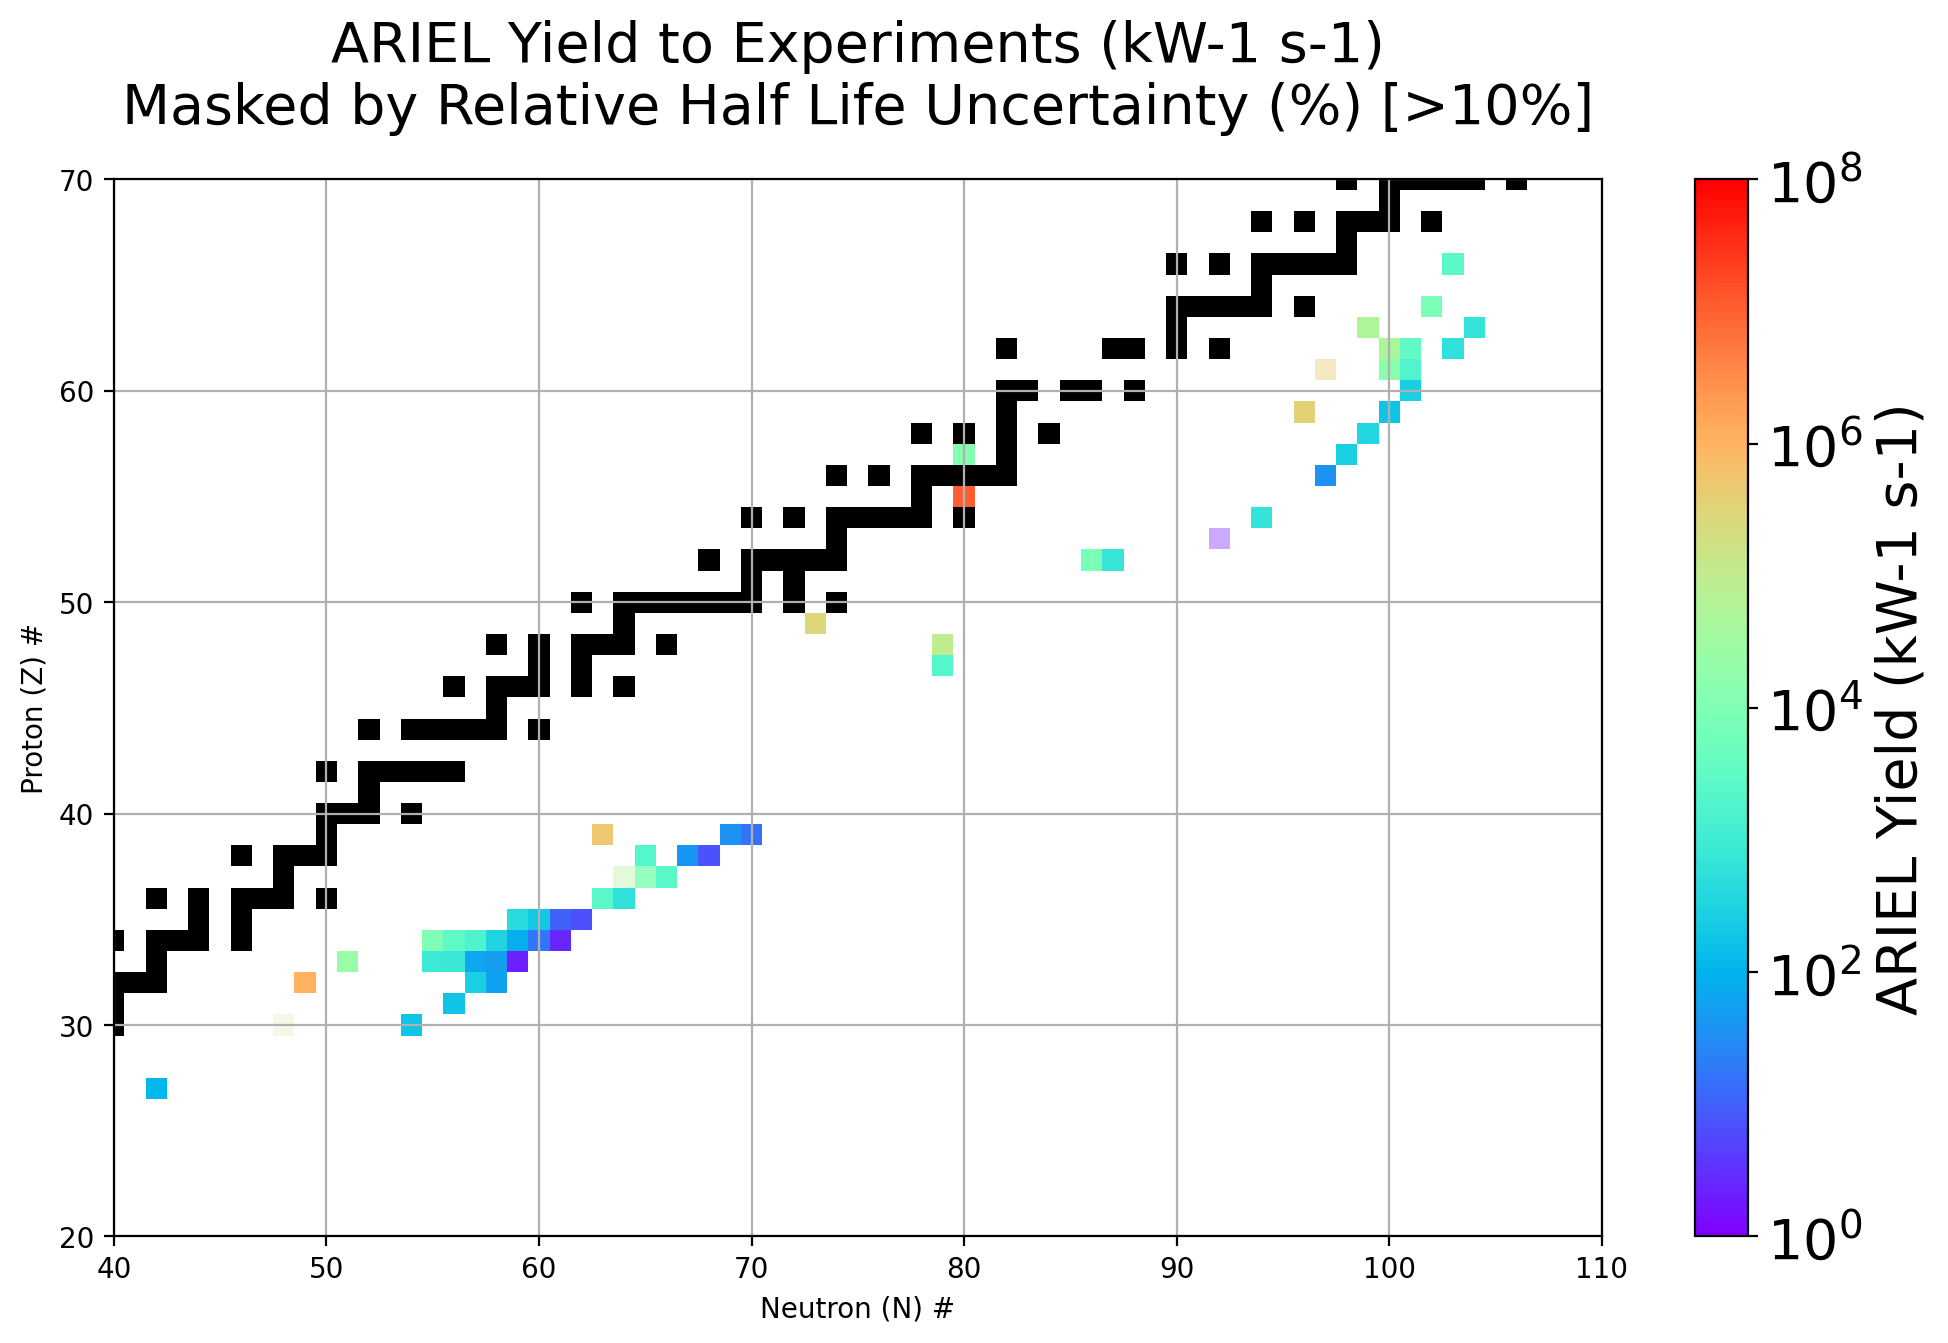

In [14]:
#ARIEL yield masked by relative half life uncertainty 
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(ariel_n_num, ariel_p_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=exp_yield, norm=matplotlib.colors.LogNorm(), cmap="rainbow")
cbar = plt.colorbar()
plt.clim(1,1e8)
cbar.ax.tick_params(labelsize=20)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=rel_hl_unc, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.clim(10,11)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')

plt.title('ARIEL Yield to Experiments (kW-1 s-1)\nMasked by Relative Half Life Uncertainty (%) [>10%]', fontsize = 20, pad = 20)
cbar.set_label('ARIEL Yield (kW-1 s-1)', fontsize = 20)


plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("hl_masking_ariel")
plt.show()


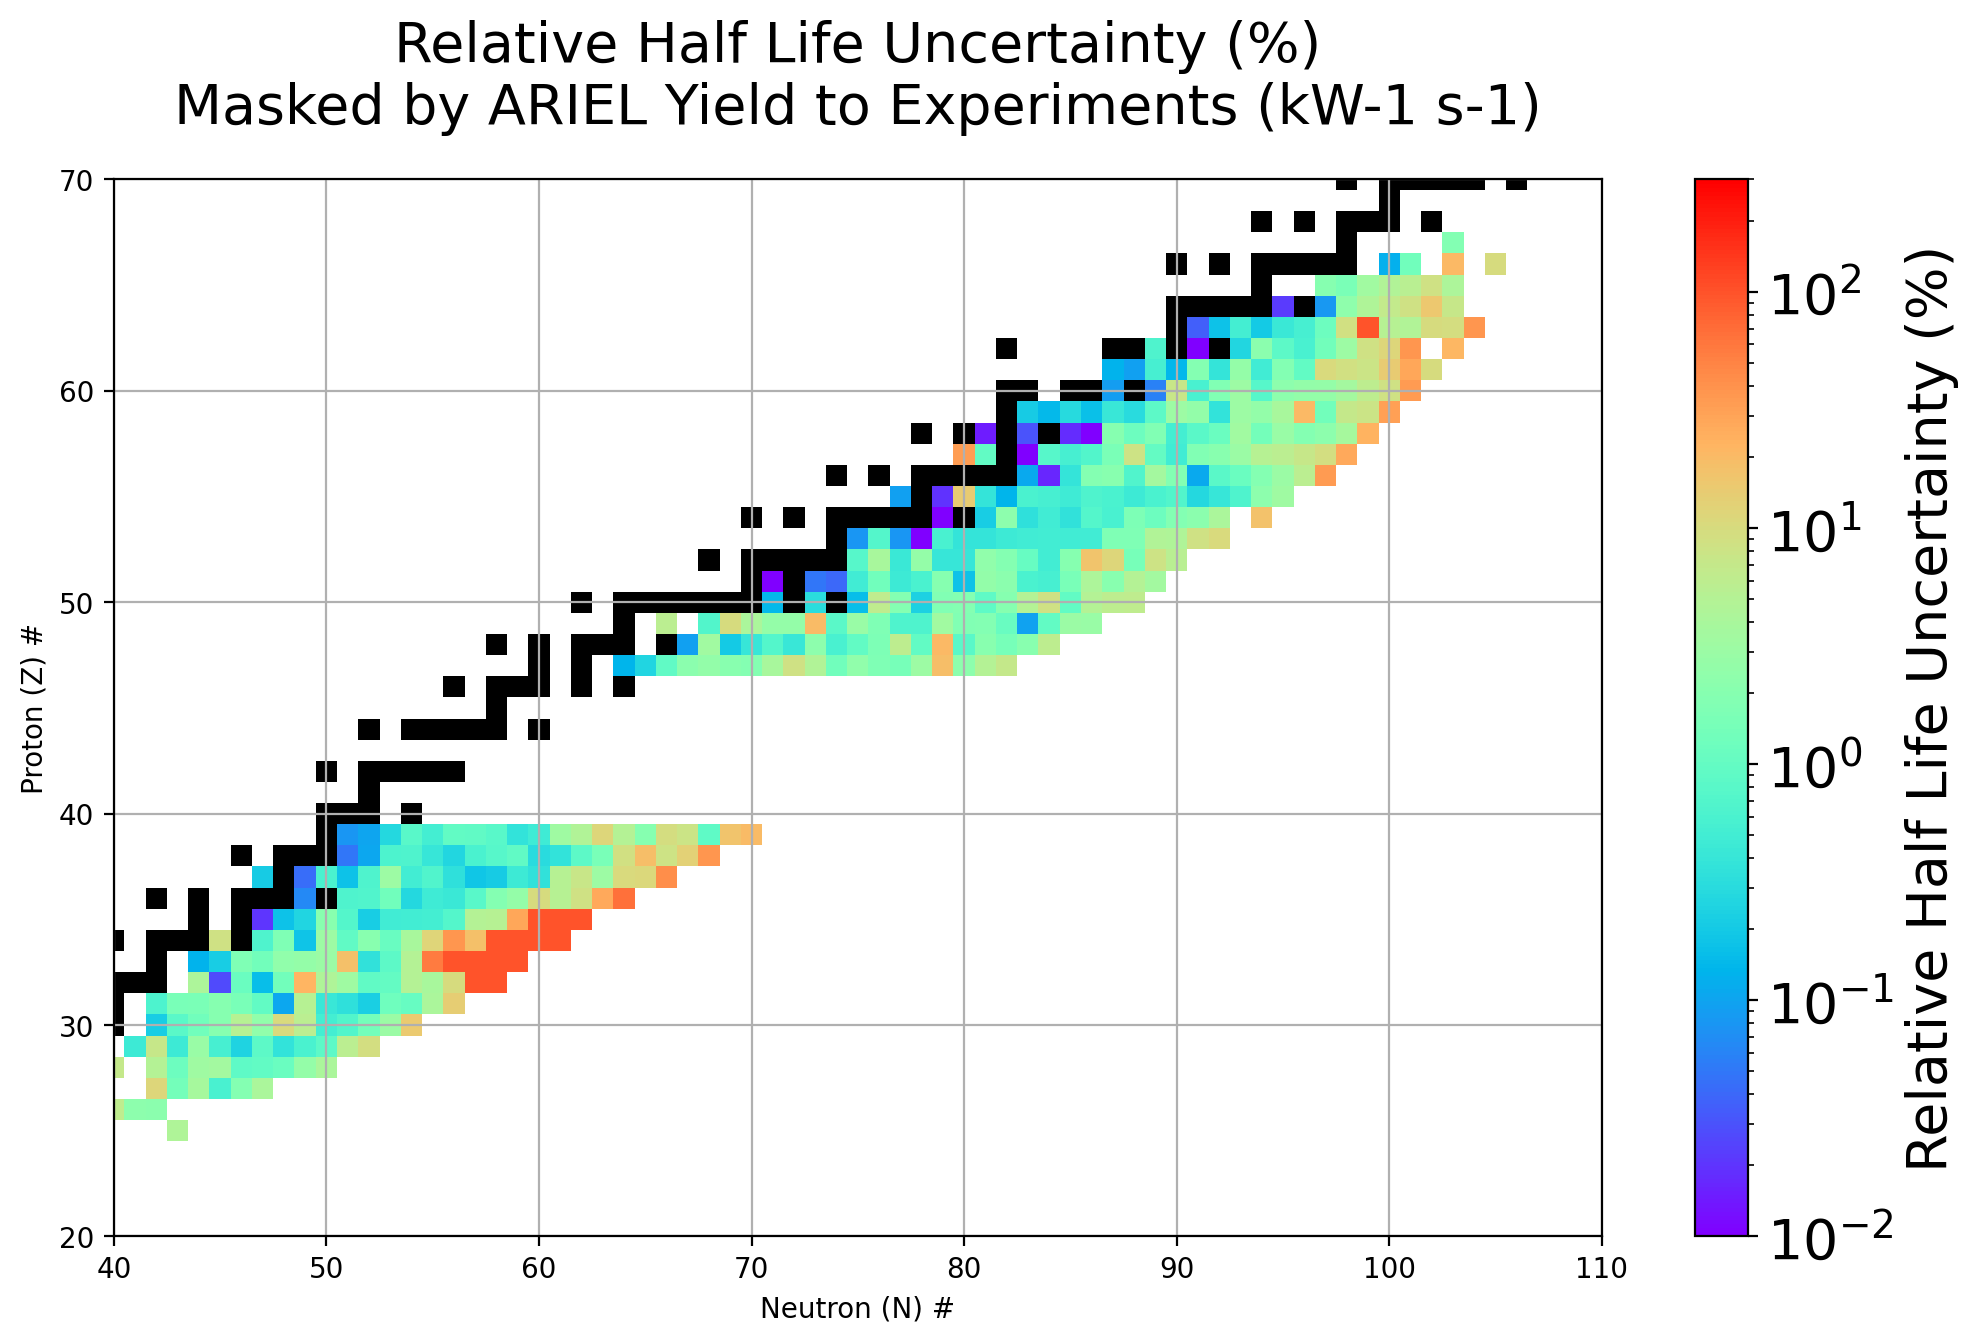

In [15]:
#Relative Half life Uncertainty Masked by ARIEL Yields
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=rel_hl_unc, norm=matplotlib.colors.LogNorm(), cmap = "rainbow")
plt.clim(1e-2,300)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.hist2d(mask_n, mask_p, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=ariel_mask_weight, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.clim(0.01,1)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')

plt.title('Relative Half Life Uncertainty (%)\nMasked by ARIEL Yield to Experiments (kW-1 s-1)', fontsize = 20, pad = 20)
cbar.set_label('Relative Half Life Uncertainty (%)', fontsize = 20)
plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("ariel_masking_hl")
plt.show()


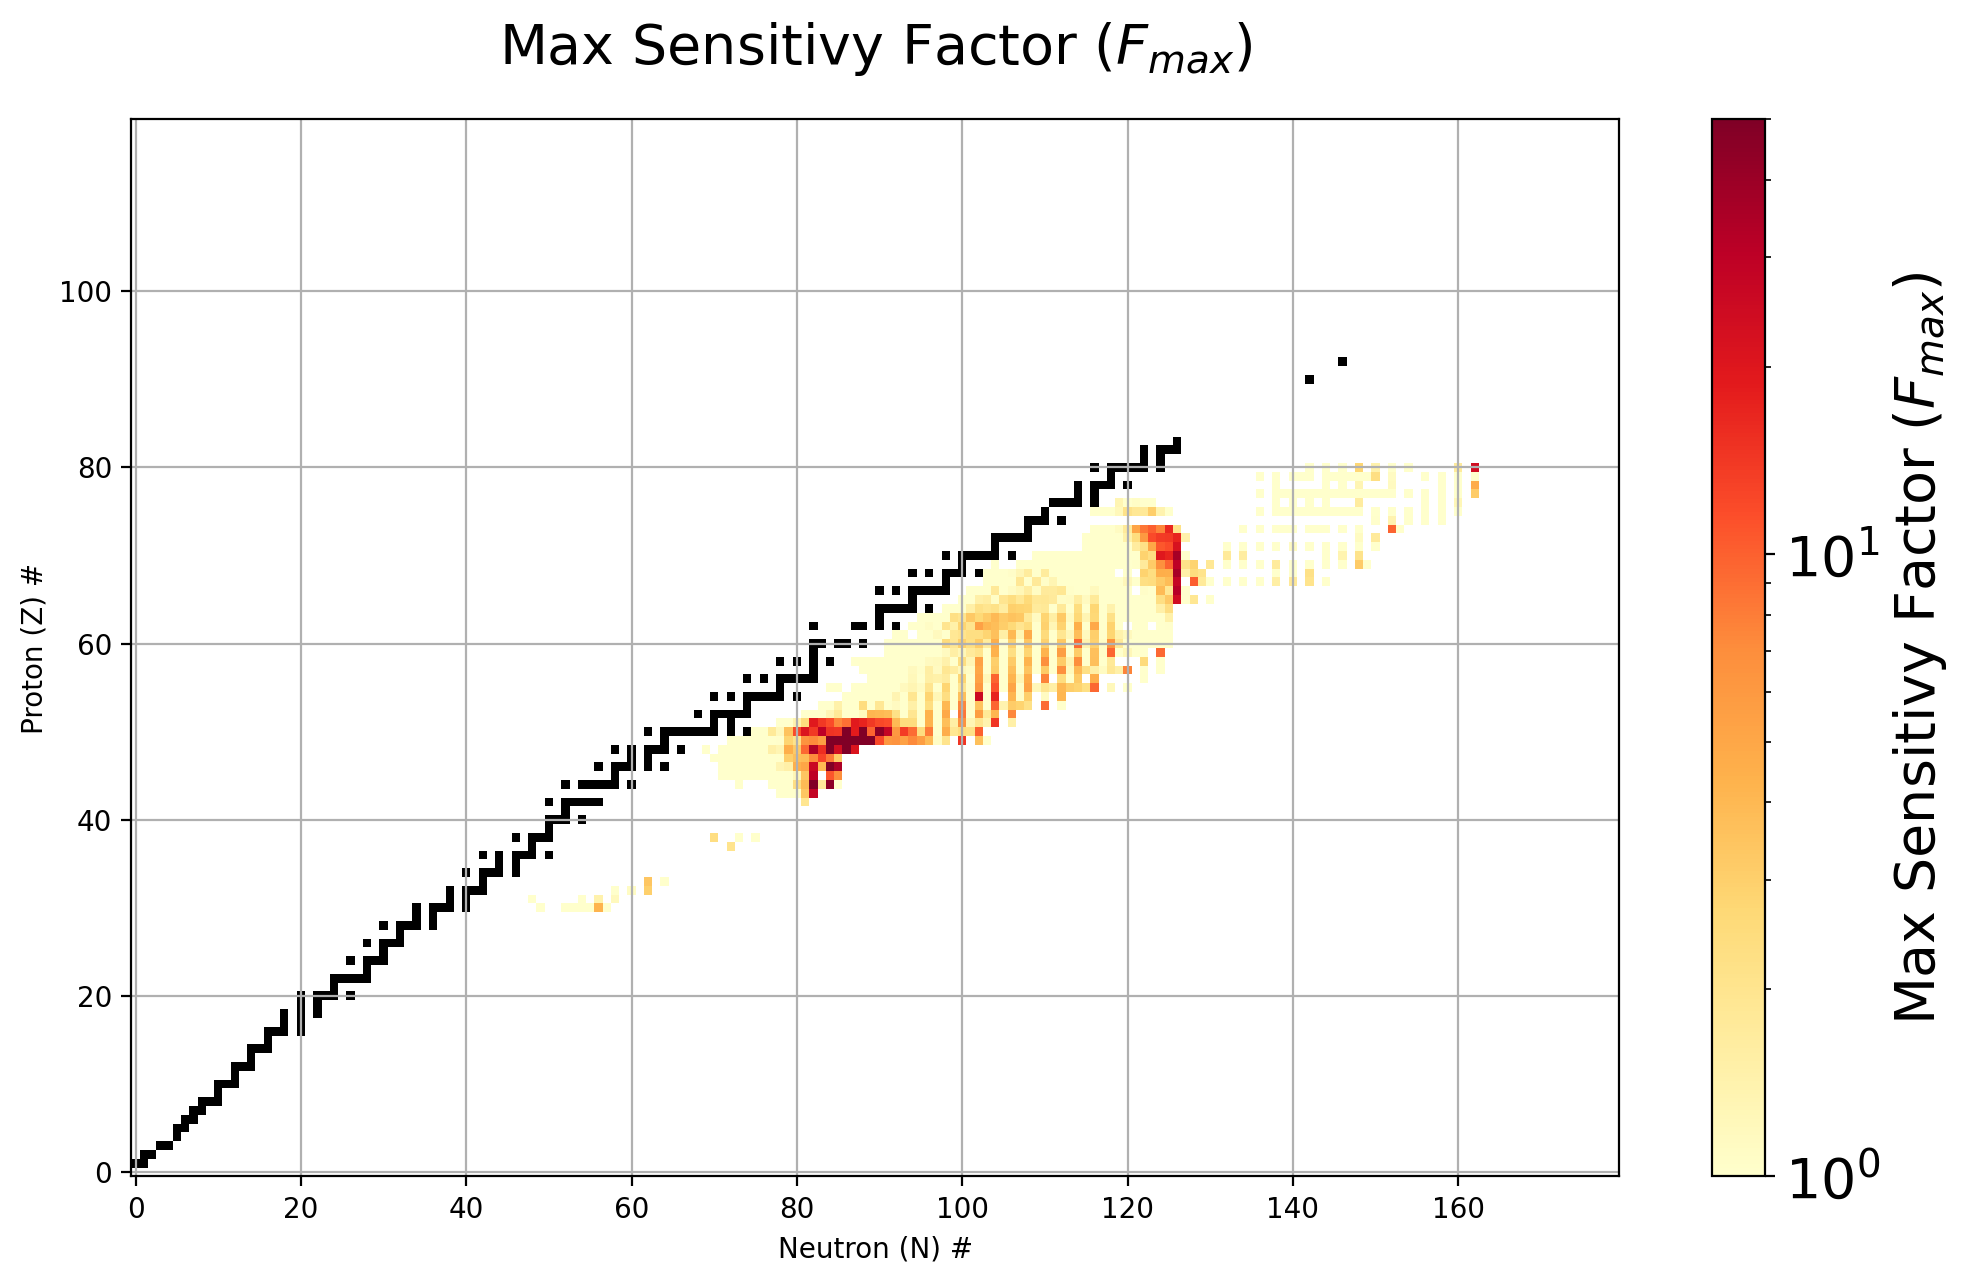

In [16]:
#Plotting more data 

#Able to interact with plot

fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(nnum, pnum, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=fmax,norm=matplotlib.colors.LogNorm(), cmap = "YlOrRd")
plt.clim(1,50)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')
plt.title('Max Sensitivy Factor ($F_{max}$)', fontsize = 20, pad = 20)
cbar.set_label('Max Sensitivy Factor ($F_{max}$)', fontsize = 20)
plt.grid()
# plt.xlim(40,110)
# plt.ylim(20,70)
plt.savefig("fmax_plot")
plt.show()


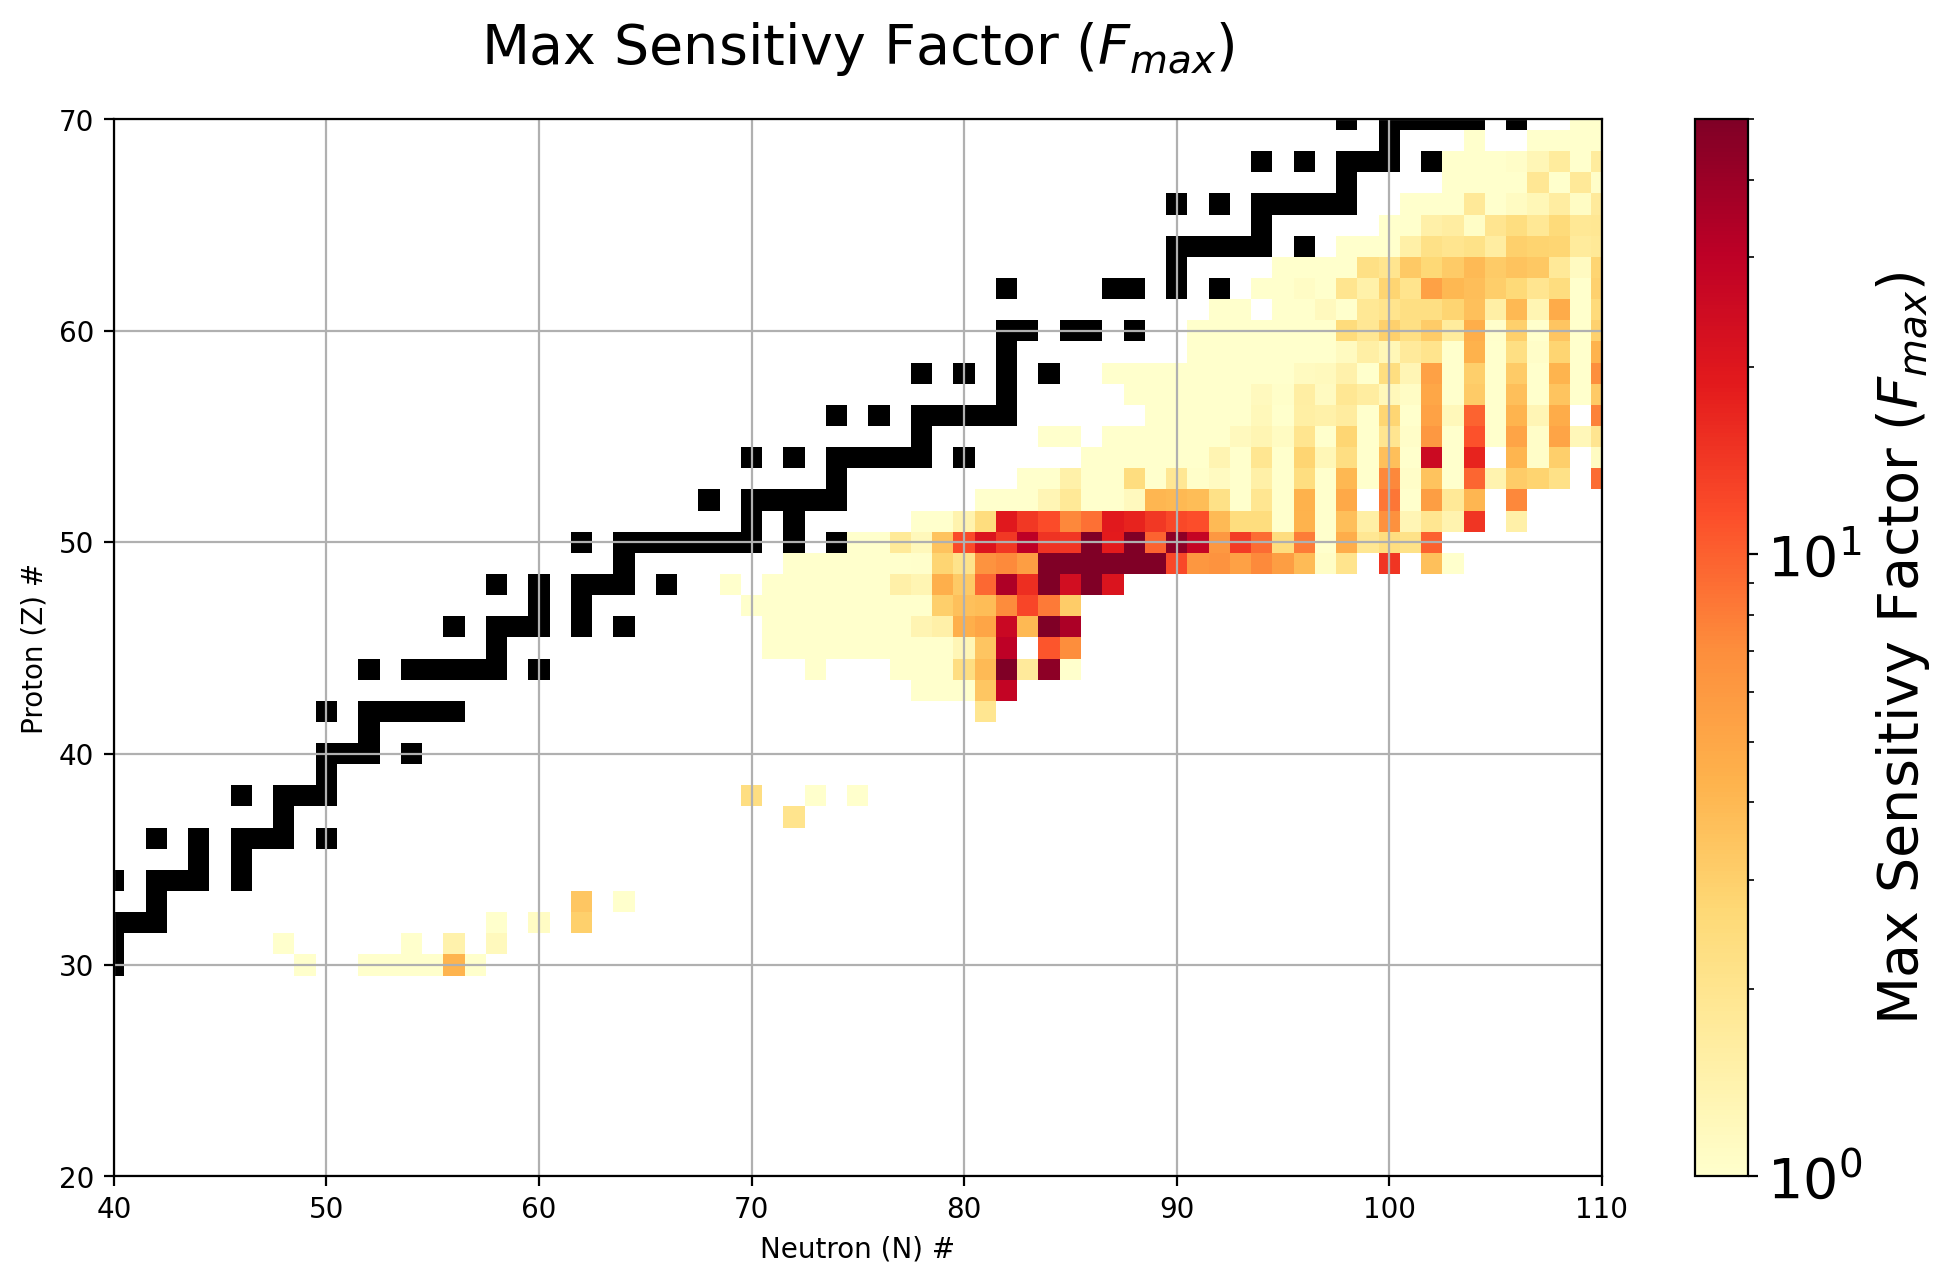

In [17]:

fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(nnum, pnum, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=fmax,norm=matplotlib.colors.LogNorm(), cmap = "YlOrRd")
plt.clim(1,50)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')
plt.title('Max Sensitivy Factor ($F_{max}$)', fontsize = 20, pad = 20)
cbar.set_label('Max Sensitivy Factor ($F_{max}$)', fontsize = 20)
plt.grid()
plt.xlim(40,110)
plt.ylim(20,70)
plt.savefig("fmax_plot_cropped")
plt.show()


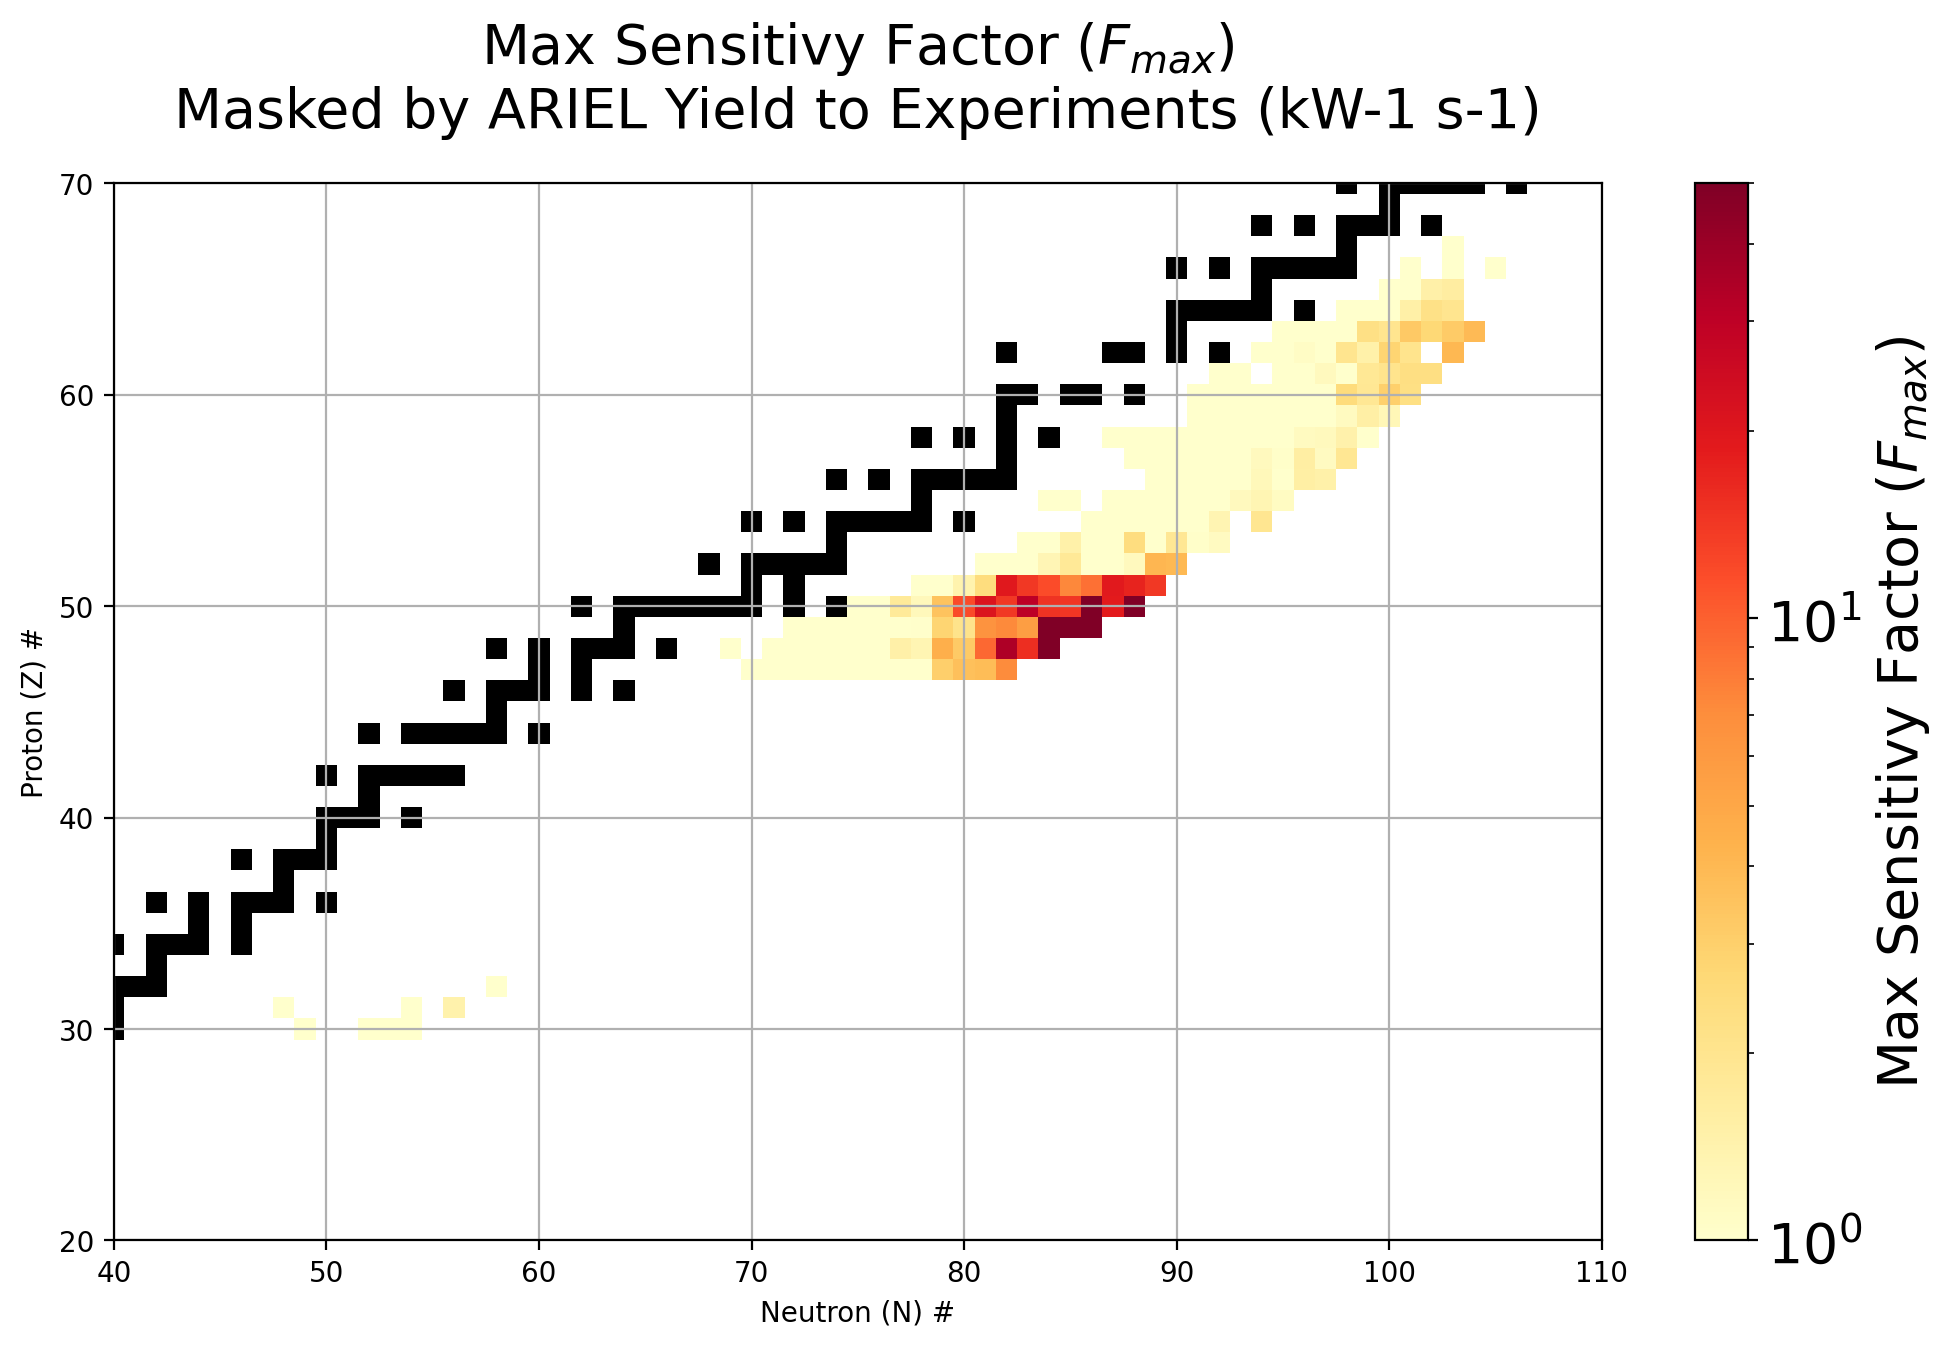

In [18]:
#Plotting more data 
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(nnum, pnum, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=fmax,norm=matplotlib.colors.LogNorm(), cmap = "YlOrRd")
plt.clim(1,50)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.hist2d(mask_n, mask_p, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=ariel_mask_weight, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.clim(0.01,1)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')
plt.title('Max Sensitivy Factor ($F_{max}$)\nMasked by ARIEL Yield to Experiments (kW-1 s-1)', fontsize = 20, pad = 20)
cbar.set_label('Max Sensitivy Factor ($F_{max}$)', fontsize = 20)
plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("ariel_masking_fmax")
plt.show()

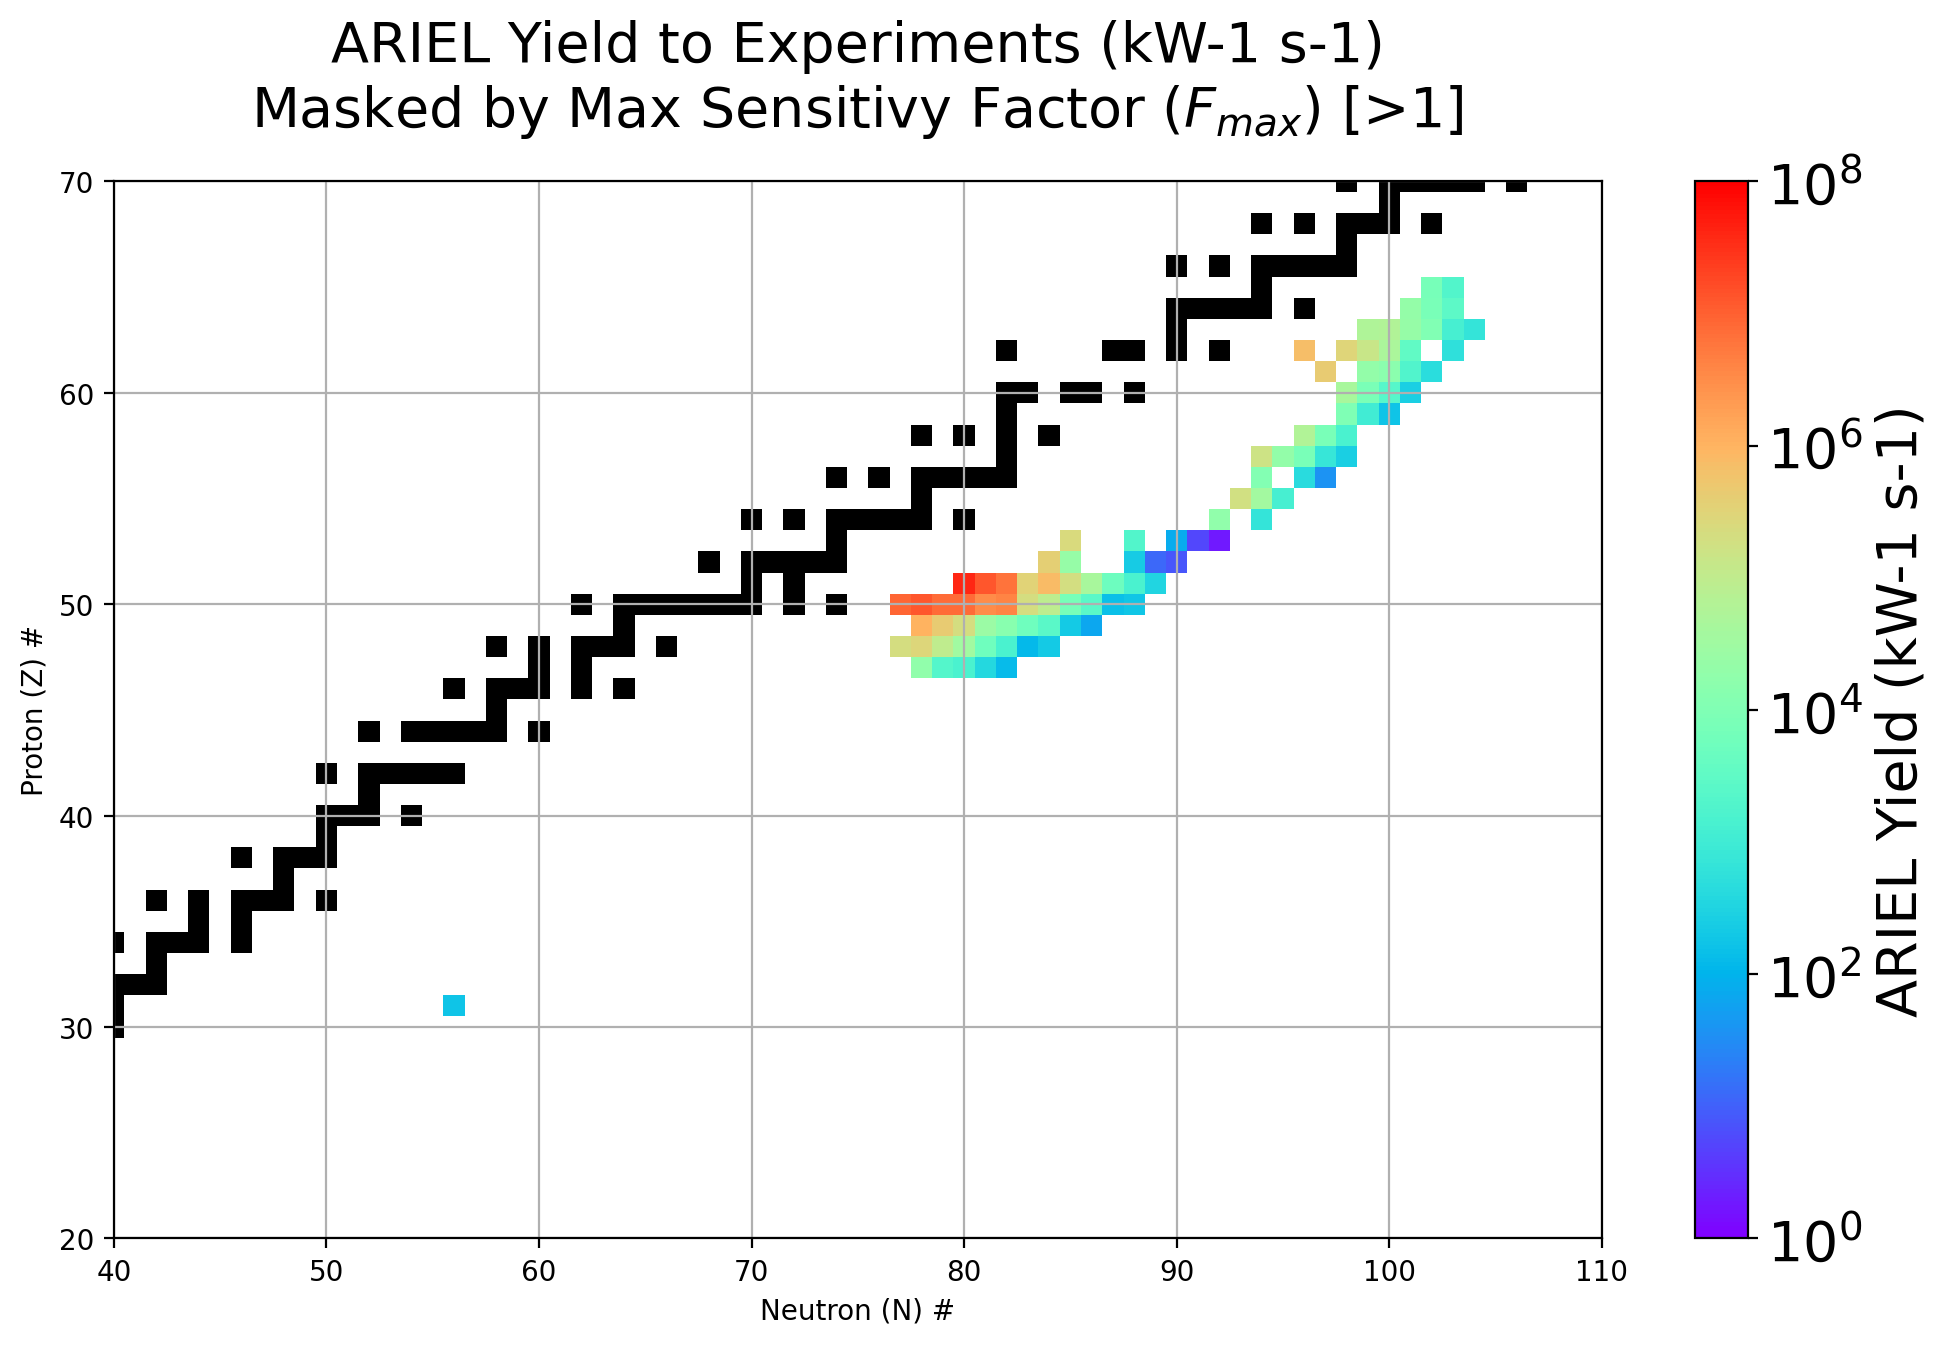

In [19]:
#ARIEL yield masked by relative half life uncertainty 
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(ariel_n_num, ariel_p_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=exp_yield, norm=matplotlib.colors.LogNorm(), cmap="rainbow")
cbar = plt.colorbar()
plt.clim(1,1e8)
cbar.ax.tick_params(labelsize=20)
plt.hist2d(nnum, pnum, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=fmax, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.clim(0.99,1.0)
plt.hist2d(mask_n, mask_p, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=fmax_weight, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.clim(0.01,1)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')

plt.title('ARIEL Yield to Experiments (kW-1 s-1)\nMasked by Max Sensitivy Factor ($F_{max}$) [>1]', fontsize = 20, pad = 20)
cbar.set_label('ARIEL Yield (kW-1 s-1)', fontsize = 20)


plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("fmax_masking_ariel")
plt.show()


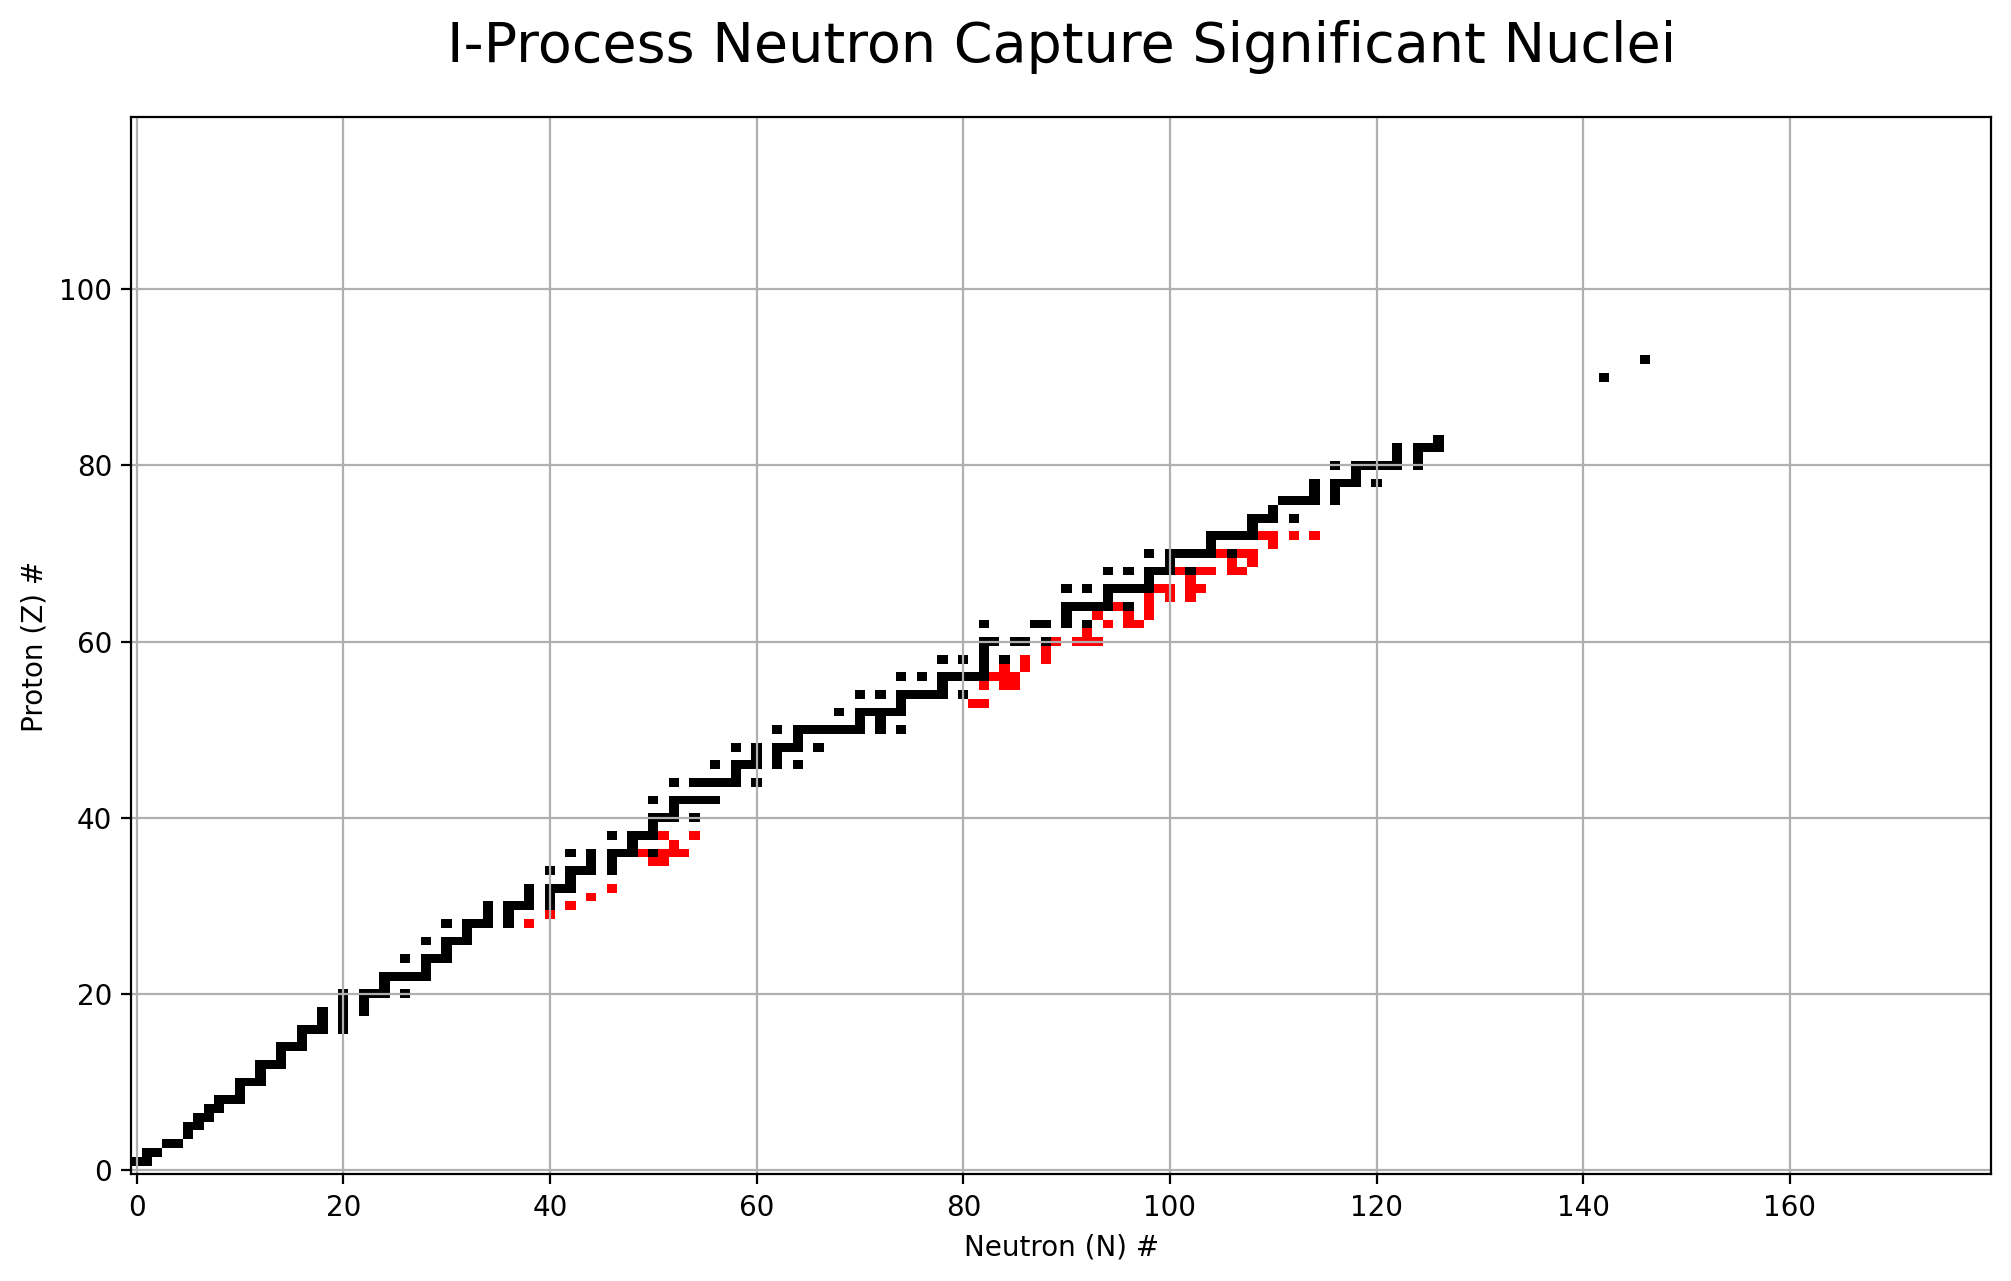

In [20]:
#Interesting i-process 
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(iprocess_n_num, iprocess_p_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], norm=matplotlib.colors.LogNorm(), cmap=mycmap3)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')

plt.title('I-Process Neutron Capture Significant Nuclei', fontsize = 20, pad = 20)


# plt.xlim(40,110)
# plt.ylim(20,70)
plt.grid()
plt.savefig("iprocess")
plt.show()



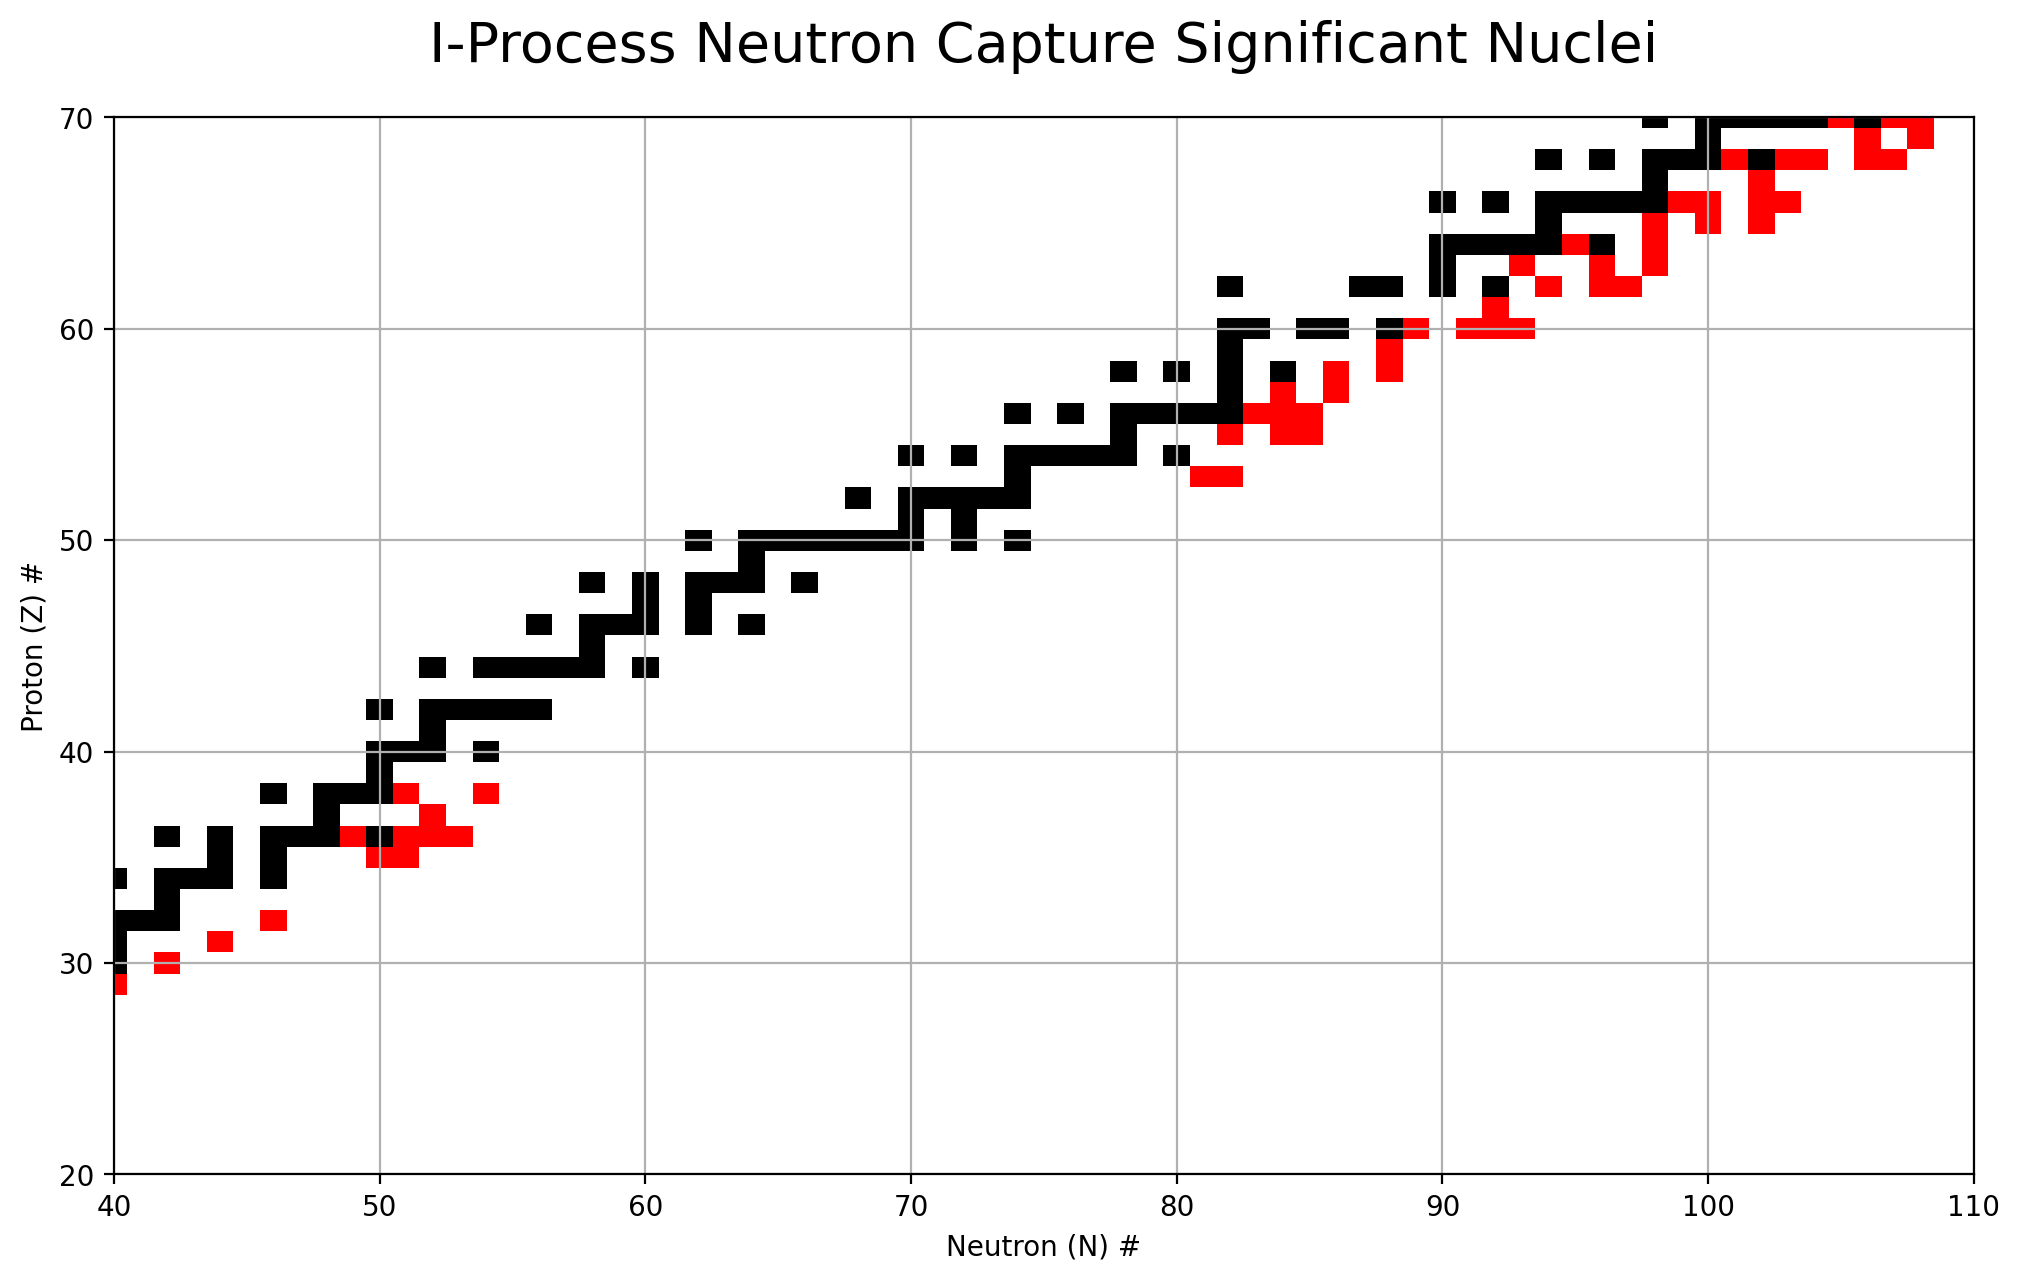

In [21]:
#Interesting i-process 
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(iprocess_n_num, iprocess_p_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], norm=matplotlib.colors.LogNorm(), cmap=mycmap3)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')

plt.title('I-Process Neutron Capture Significant Nuclei', fontsize = 20, pad = 20)


plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("iprocess_cropped")
plt.show()



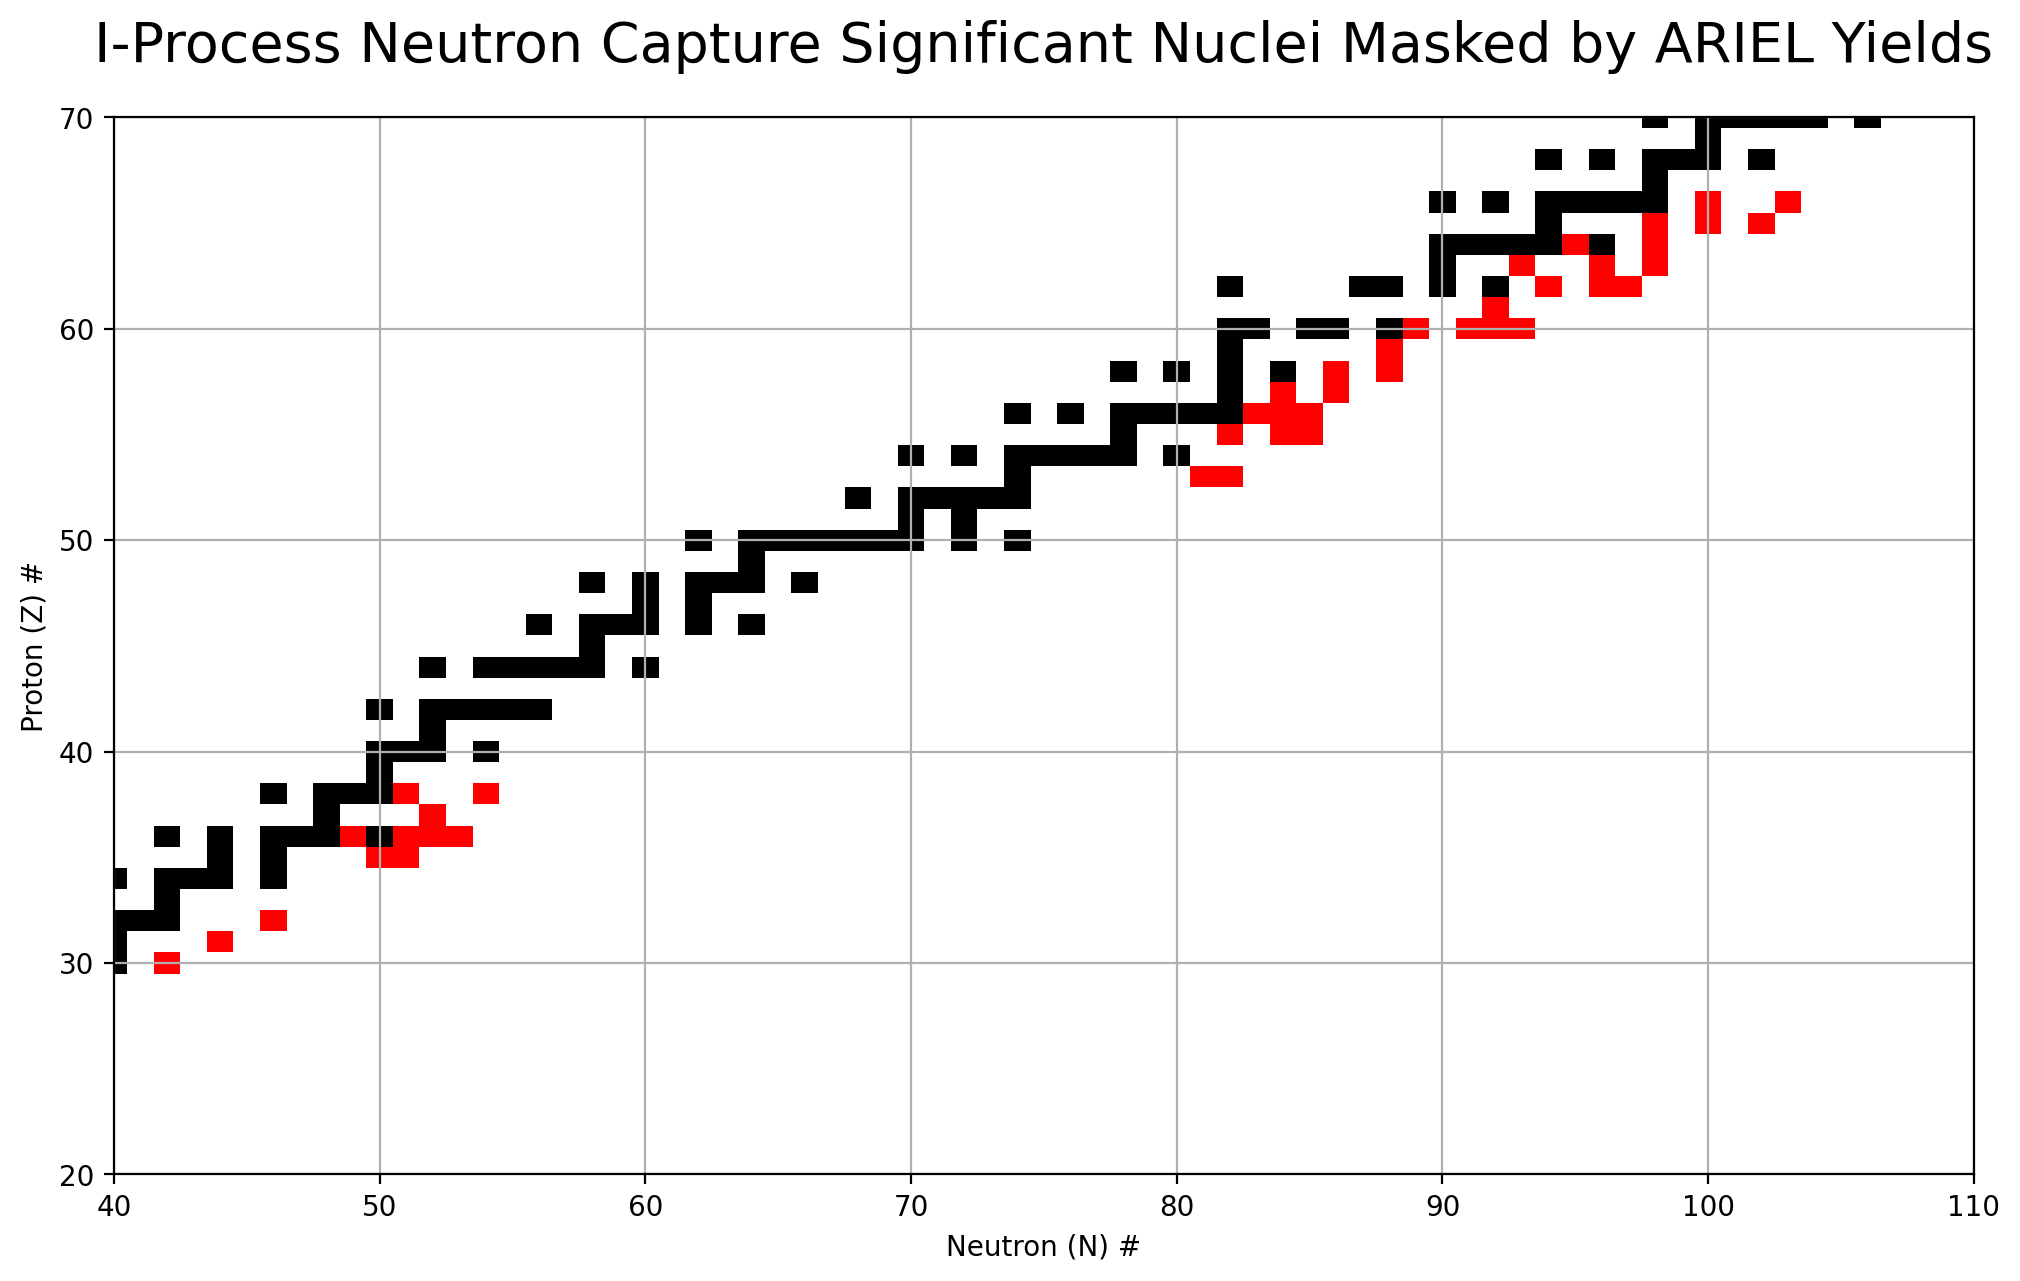

In [22]:
#Interesting i-process 
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(iprocess_n_num, iprocess_p_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], norm=matplotlib.colors.LogNorm(), cmap=mycmap3)
plt.hist2d(mask_n, mask_p, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=ariel_mask_weight, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.clim(0.01,1)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')

plt.title('I-Process Neutron Capture Significant Nuclei Masked by ARIEL Yields', fontsize = 20, pad = 20)
plt.grid(True)


plt.xlim(40,110)
plt.ylim(20,70)
plt.savefig("ariel_masking_iprocess")
plt.show()



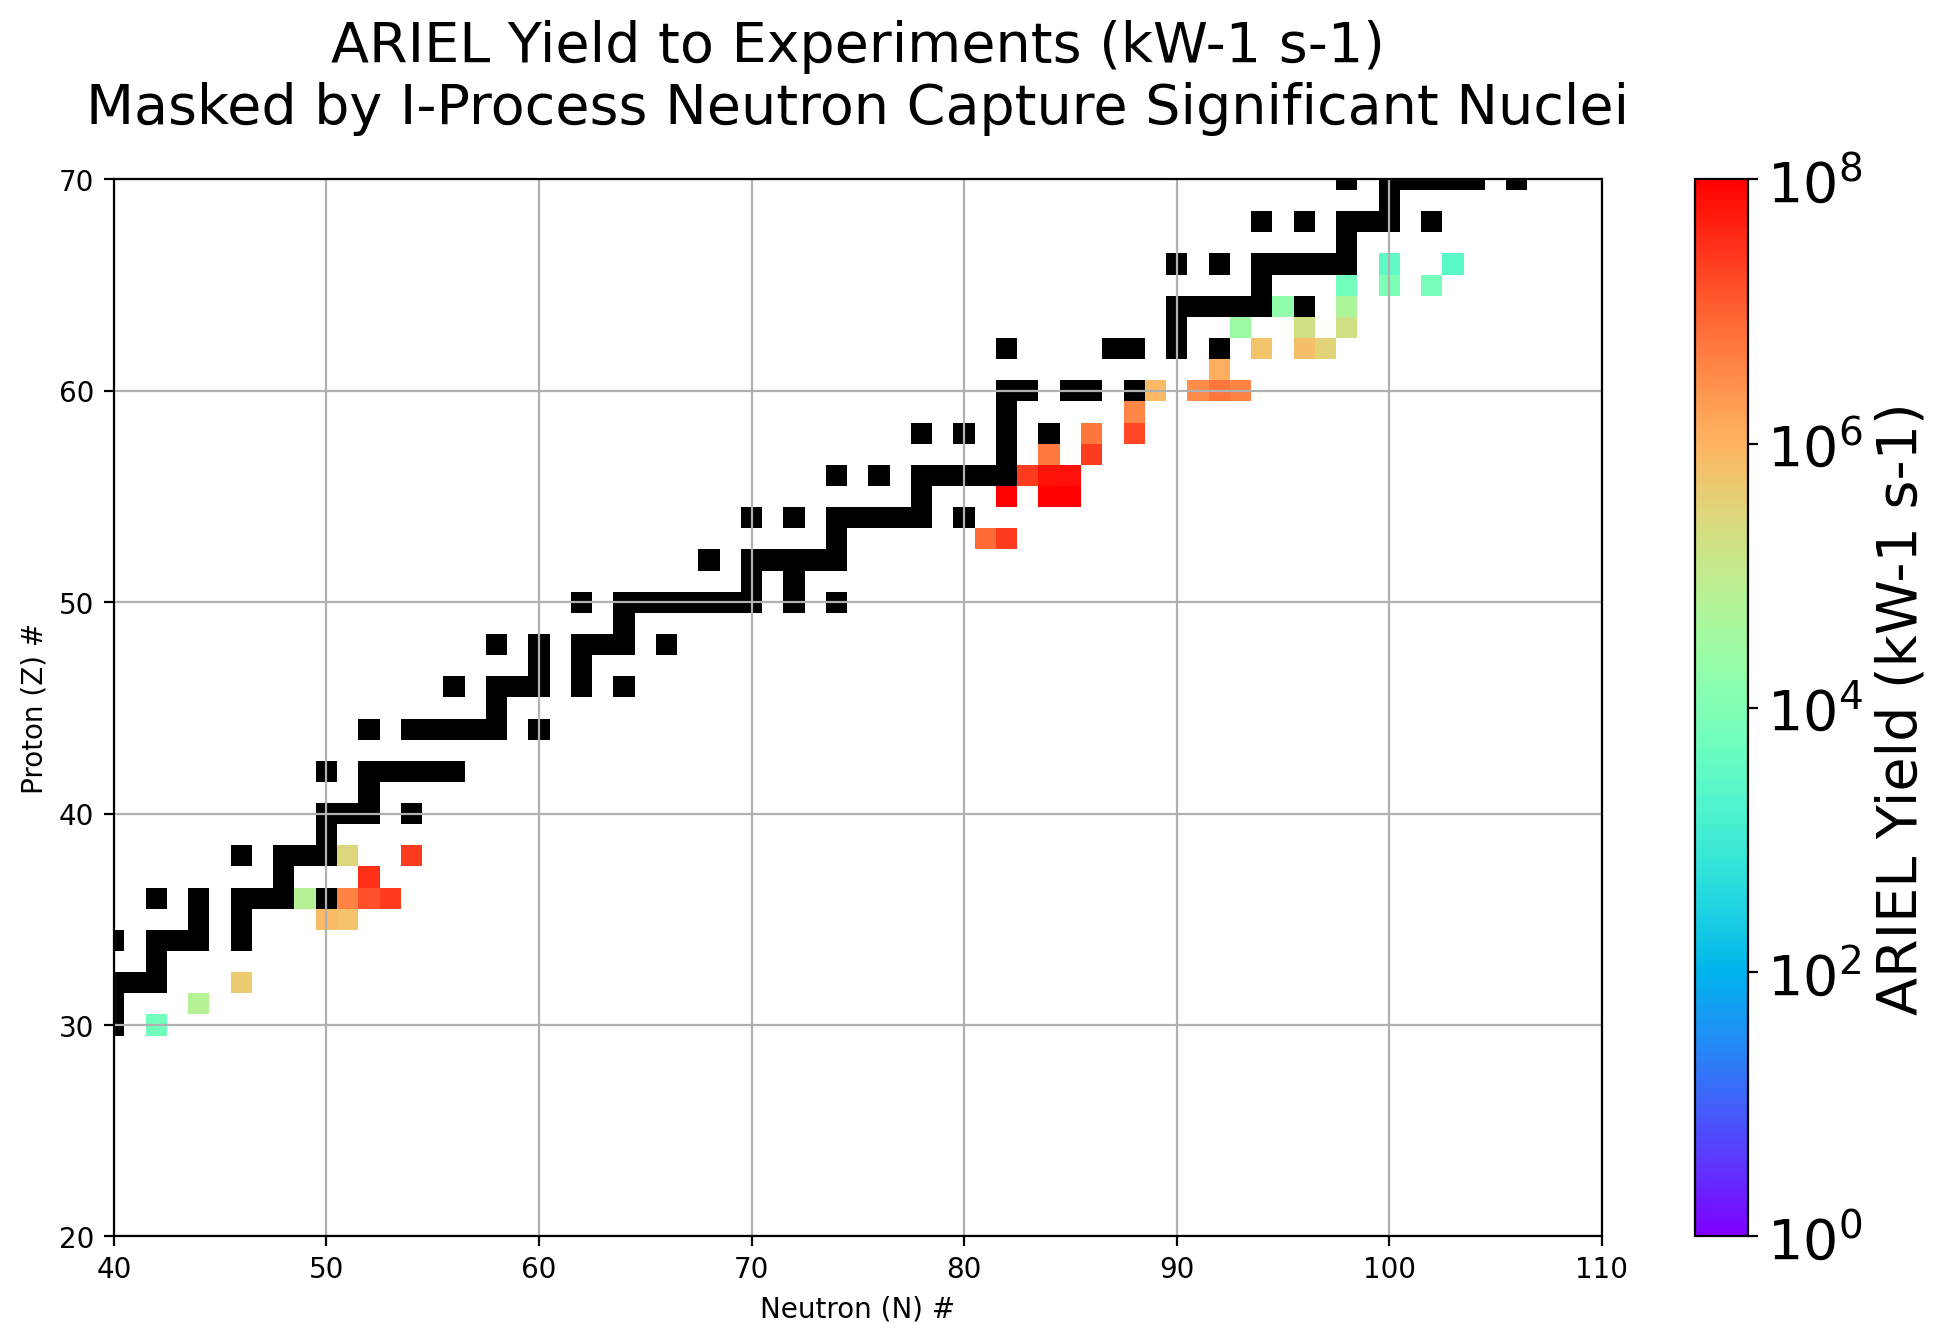

In [23]:
#ARIEL yield masked by relative half life uncertainty 
fig = plt.figure(figsize = (12,7), dpi=200)
ax = plt.gca()
plt.hist2d(ariel_n_num, ariel_p_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=exp_yield, norm=matplotlib.colors.LogNorm(), cmap="rainbow")
cbar = plt.colorbar()
plt.clim(1,1e8)
cbar.ax.tick_params(labelsize=20)
plt.hist2d(mask_n, mask_p, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=iprocess_weight, norm=matplotlib.colors.LogNorm(), cmap = mycmap)
plt.hist2d(n_num, atom_num, [180,120], [[-0.5,179.5], [-0.5,119.5]], weights=stbl, cmap = mycmap2)
plt.xlabel("Neutron (N) #")
plt.ylabel('Proton (Z) #')
plt.title('ARIEL Yield to Experiments (kW-1 s-1)\nMasked by I-Process Neutron Capture Significant Nuclei', fontsize = 20, pad = 20)
cbar.set_label('ARIEL Yield (kW-1 s-1)', fontsize = 20)


plt.xlim(40,110)
plt.ylim(20,70)
plt.grid()
plt.savefig("iprocess_masking_ariel")
plt.show()
